In [87]:
# Import Dependencies

import pandas as pd
from pathlib import Path
from decimal import Decimal
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
import numpy as np

In [88]:
# Defining file paths/reading data with pandas library

hourly_file_path = Path("Resources/saleshourly.csv")
hourly_df = pd.read_csv(hourly_file_path, encoding="ISO-8859-1")

daily_file_path = Path("Resources/salesdaily.csv")
daily_df = pd.read_csv(daily_file_path, encoding="ISO-8859-1")

weekly_file_path = Path("Resources/salesweekly.csv")
weekly_df = pd.read_csv(weekly_file_path, encoding="ISO-8859-1")

monthly_file_path = Path("Resources/salesmonthly.csv")
monthly_df = pd.read_csv(monthly_file_path, encoding="ISO-8859-1")

# Hourly Sales
    - Total Pharmaceutical Sales by the Hour (plot)
    - Total Pharmaceutical Sales by Drug Classification per Hour (plot)
    - Pharmaceutical Sales by Drug Classification per Hour (plot)
    - Individual Drug Classification Hourly Sales/Percentage of Total Hourly Sales (tables)

In [89]:
hourly_df.head()

datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C  R03  R06  Year  \
0   1/2/2014 8:00    0.0   0.67    0.4    2.0   0.0   0.0  0.0  1.0  2014   
1   1/2/2014 9:00    0.0   0.00    1.0    0.0   2.0   0.0  0.0  0.0  2014   
2  1/2/2014 10:00    0.0   0.00    0.0    3.0   2.0   0.0  0.0  0.0  2014   
3  1/2/2014 11:00    0.0   0.00    0.0    2.0   1.0   0.0  0.0  0.0  2014   
4  1/2/2014 12:00    0.0   2.00    0.0    5.0   2.0   0.0  0.0  0.0  2014   

   Month  Hour Weekday Name  
0      1     8     Thursday  
1      1     9     Thursday  
2      1    10     Thursday  
3      1    11     Thursday  
4      1    12     Thursday

In [90]:
hourly_df.dtypes

datum            object
M01AB           float64
M01AE           float64
N02BA           float64
N02BE           float64
N05B            float64
N05C            float64
R03             float64
R06             float64
Year              int64
Month             int64
Hour              int64
Weekday Name     object
dtype: object

In [91]:
# Clean DataFrame

# Drop unrelated columns
drop_hourly_df = hourly_df.drop(columns=['datum', 'Month', 'Weekday Name', 'Year'])

# 'M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06'

# Calculate total sales
drop_hourly_df["Total_Sales"] = drop_hourly_df['M01AB'] + drop_hourly_df['M01AE'] + drop_hourly_df['N02BA'] + drop_hourly_df['N02BE'] + drop_hourly_df['N05B'] + drop_hourly_df['N05C'] + drop_hourly_df['R03'] + drop_hourly_df['R06']
drop_hourly_df["Total_Sales"] = drop_hourly_df["Total_Sales"].astype("float")

# Group by hour
avg_hourly_df = drop_hourly_df.groupby(["Hour"]).mean()

# Drop rows (hours) where total sales = 0
avg_hourly_df = avg_hourly_df[avg_hourly_df.Total_Sales != 0]

avg_hourly_df

M01AB     M01AE     N02BA     N02BE      N05B      N05C       R03  \
Hour                                                                         
7     0.013387  0.018225  0.011876  0.160914  0.029454  0.001900  0.028029   
8     0.266500  0.154415  0.205492  1.285768  0.488980  0.023267  0.313113   
9     0.352426  0.212690  0.328968  1.701878  0.685353  0.030864  0.354572   
10    0.411841  0.258468  0.398038  1.954098  0.874808  0.042102  0.392490   
11    0.458818  0.314684  0.406362  2.303831  0.951870  0.044951  0.385456   
12    0.447742  0.307677  0.344417  2.377070  0.903120  0.059255  0.333586   
13    0.379614  0.262393  0.322177  2.102619  0.827271  0.061768  0.364841   
14    0.407295  0.273398  0.252129  2.001103  0.647388  0.047503  0.349141   
15    0.309862  0.237648  0.221344  2.019181  0.560260  0.053082  0.308444   
16    0.274719  0.249647  0.195085  2.005011  0.518768  0.044476  0.288956   
17    0.294013  0.281165  0.219775  2.050754  0.489283  0.040084  0.379946   
18    0.350684  0.318682  0.294520  2.452263  0.549272  0.047325  0.526254   
19    0.421068  0.383263  0.279501  2.832204  0.560749  0.039530  0.587646   
20    0.386418  0.399240  0.261263  2.878393  0.485817  0.042399  0.584947   
21    0.255454  0.219248  0.136405  1.747539  0.274327  0.015044  0.307443   
22    0.004159  0.005294  0.003207  0.046765  0.007086  0.000000  0.007838   
23    0.000000  0.000000  0.000079  0.000000  0.000198  0.000000  0.000000   

           R06  Total_Sales  
Hour                         
7     0.008219     0.272004  
8     0.130817     2.868352  
9     0.176801     3.843552  
10    0.222483     4.554328  
11    0.230874     5.096845  
12    0.234832     5.007699  
13    0.225078     4.545759  
14    0.191404     4.169361  
15    0.177604     3.887425  
16    0.151707     3.728370  
17    0.164403     3.919423  
18    0.243326     4.782325  
19    0.271991     5.375953  
20    0.287443     5.325920  
21    0.181584     3.137042  
22    0.001861     0.076209  
23    0.000000     0.000277

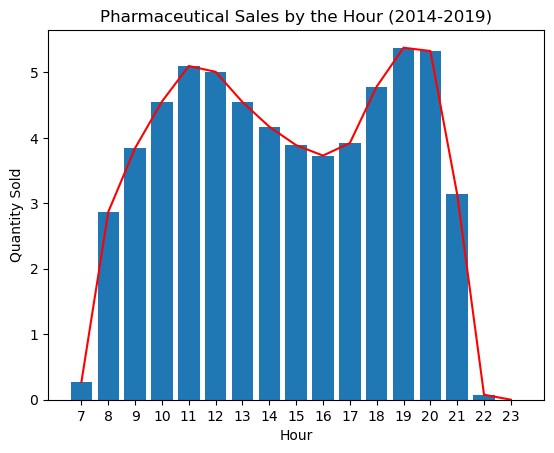

In [92]:
# Bar/Line graph of total sales by the hour

hour = avg_hourly_df.index
total_sales = avg_hourly_df['Total_Sales']
plt.bar(hour, total_sales)
plt.plot(hour, total_sales, color='red')
plt.title("Pharmaceutical Sales by the Hour (2014-2019)")
plt.xlabel("Hour")
plt.ylabel("Quantity Sold")
plt.xticks(hour)
plt.show()

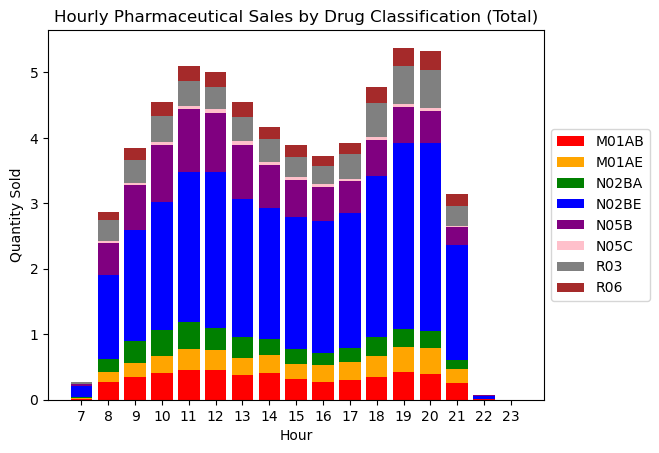

In [93]:
# Stacked bar graph of total sales by the hour according to drug classsification

M01AB = avg_hourly_df['M01AB']
M01AE = avg_hourly_df['M01AE']
N02BA = avg_hourly_df['N02BA']
N02BE = avg_hourly_df['N02BE']
N05B = avg_hourly_df['N05B']
N05C = avg_hourly_df['N05C']
R03 = avg_hourly_df['R03']
R06 = avg_hourly_df['R06']

plt.bar(hour, M01AB, color='red')
plt.bar(hour, M01AE, bottom=M01AB, color='orange')
plt.bar(hour, N02BA, bottom=M01AB+M01AE, color='green')
plt.bar(hour, N02BE, bottom=M01AB+M01AE+N02BA, color='blue')
plt.bar(hour, N05B, bottom=M01AB+M01AE+N02BA+N02BE, color='purple')
plt.bar(hour, N05C, bottom=M01AB+M01AE+N02BA+N02BE+N05B, color='pink')
plt.bar(hour, R03, bottom=M01AB+M01AE+N02BA+N02BE+N05B+N05C, color='grey')
plt.bar(hour, R06, bottom=M01AB+M01AE+N02BA+N02BE+N05B+N05C+R03, color='brown')
plt.xlabel("Hour")
plt.ylabel("Quantity Sold")
plt.xticks(hour)
plt.legend(["M01AB", "M01AE", "N02BA", "N02BE", "N05B", "N05C", "R03", "R06"], loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Hourly Pharmaceutical Sales by Drug Classification (Total)")
plt.show()

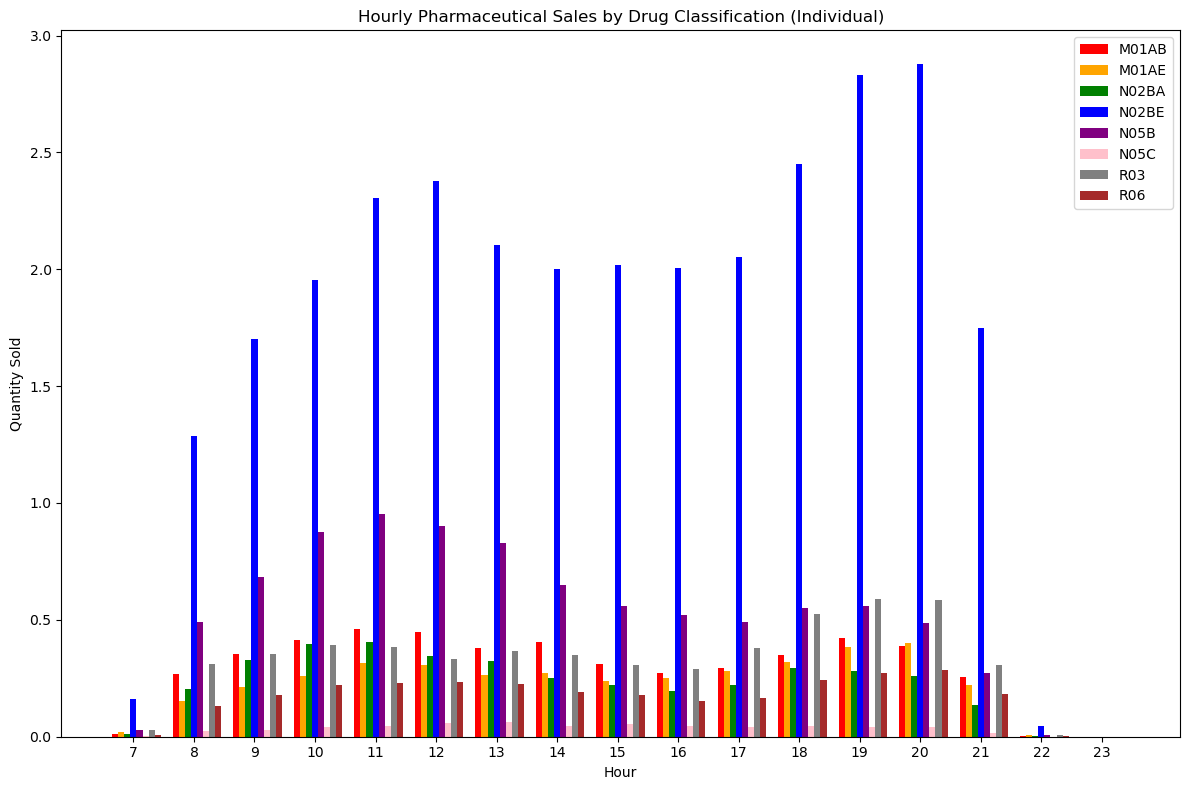

In [94]:
# Grouped bar graph of total sales by the hour separated into drug classsifications

n_groups = len(hour)
bar_width = 0.1 
index = np.arange(n_groups)

plt.figure(figsize=(12, 8))

plt.bar(index - 3*bar_width, M01AB, bar_width, label='M01AB', color='red')
plt.bar(index - 2*bar_width, M01AE, bar_width, label='M01AE', color='orange')
plt.bar(index - bar_width, N02BA, bar_width, label='N02BA', color='green')
plt.bar(index, N02BE, bar_width, label='N02BE', color='blue')
plt.bar(index + bar_width, N05B, bar_width, label='N05B', color='purple')
plt.bar(index + 2*bar_width, N05C, bar_width, label='N05C', color='pink')
plt.bar(index + 3*bar_width, R03, bar_width, label='R03', color='grey')
plt.bar(index + 4*bar_width, R06, bar_width, label='R06', color='brown')

plt.xlabel("Hour")
plt.ylabel("Quantity Sold")
plt.title("Hourly Pharmaceutical Sales by Drug Classification (Individual)")
plt.xticks(index, hour)
plt.legend()
plt.tight_layout()
plt.show()

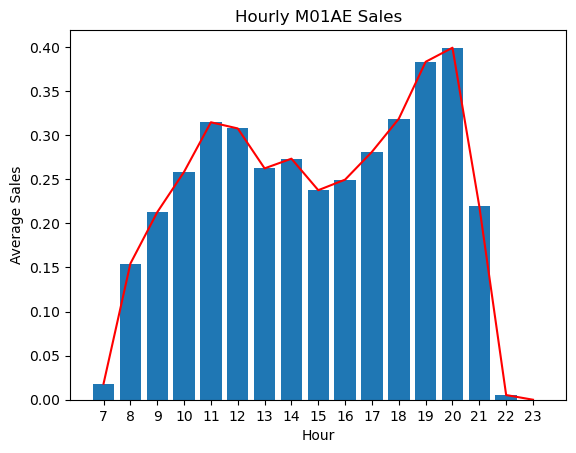

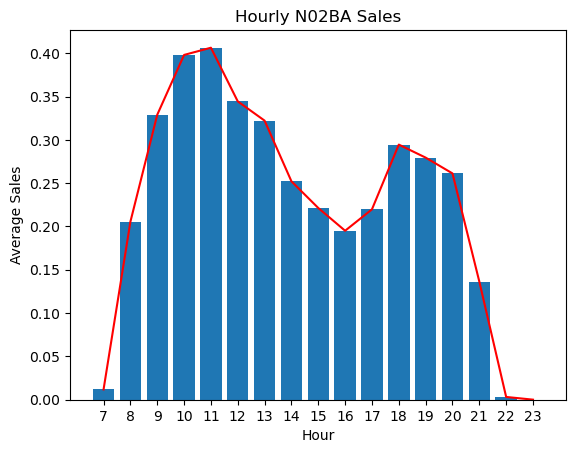

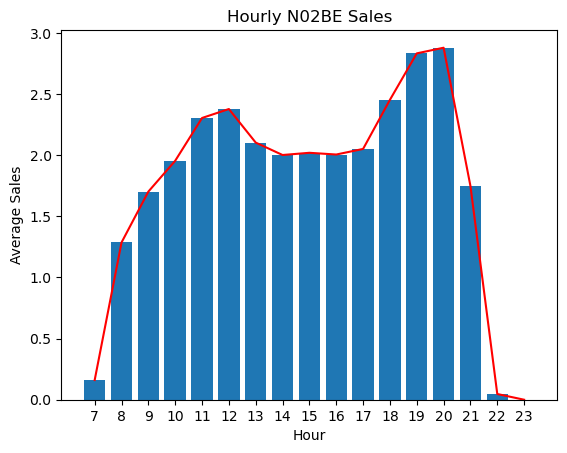

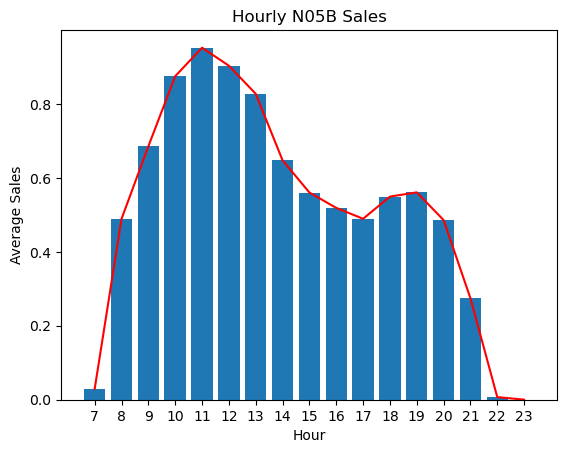

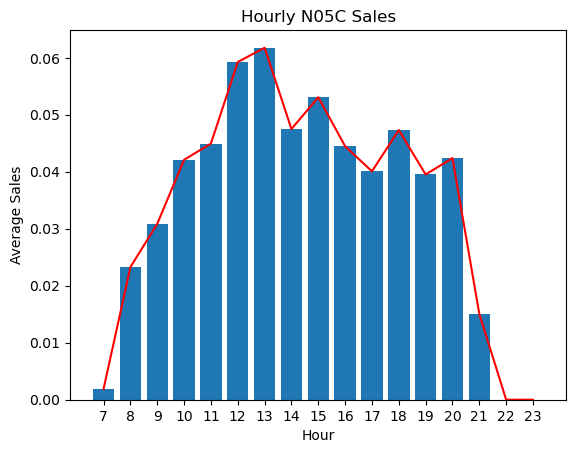

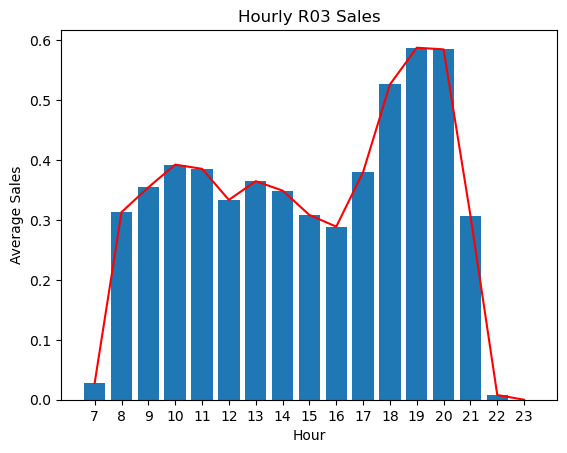

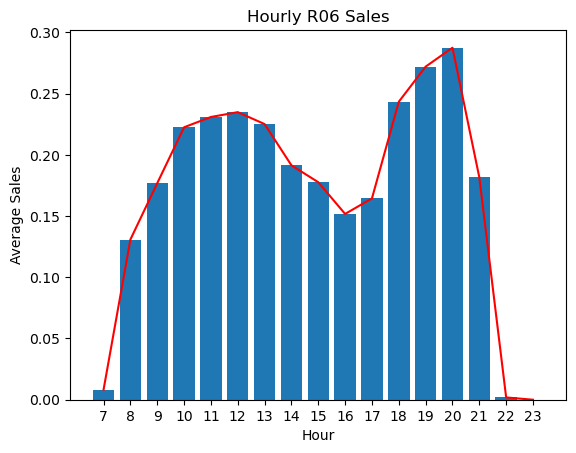

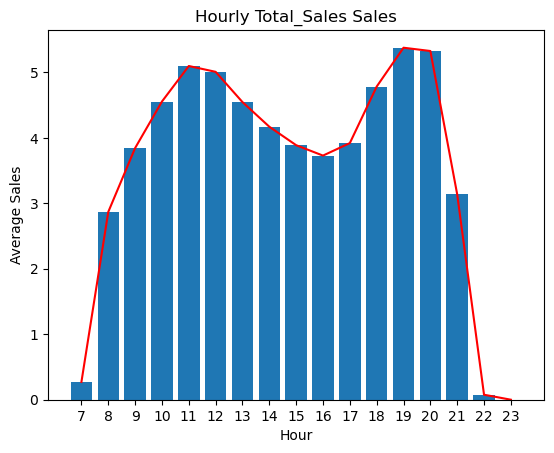

In [95]:
# Individual bar/line graphs of average hourly sales per drug classification

def plot_hourly(drug):
    hour = avg_hourly_df.index
    total_sales = avg_hourly_df[drug]
    plt.bar(hour, total_sales)
    plt.plot(hour, total_sales, color='red')
    plt.title(f'Hourly {drug} Sales')
    plt.xticks(hour)
    plt.xlabel('Hour')
    plt.ylabel('Average Sales')
    plt.show()

for i in avg_hourly_df.columns[1:9]:
    plot_hourly(i) 

In [96]:
# Ranking hourly sales in descending order per drug classification

drug_categories = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

for drug in drug_categories:

    hourly_drug_df = avg_hourly_df.drop(columns=[col for col in avg_hourly_df.columns if col not in [drug, 'Total_Sales']])
    
    hourly_drug_df['Percentage_of_Total_Sales'] = hourly_drug_df[drug] / hourly_drug_df['Total_Sales']
    hourly_drug_df['Percentage_of_Total_Sales'] = hourly_drug_df['Percentage_of_Total_Sales'].map('{:.2%}'.format)
    
    hourly_drug_df = hourly_drug_df.drop(columns=['Total_Sales'])
    
    hourly_drug_df = hourly_drug_df.sort_values(drug, ascending=False)

    print(hourly_drug_df)
    print("\n")

         M01AB Percentage_of_Total_Sales
Hour                                    
11    0.458818                     9.00%
12    0.447742                     8.94%
19    0.421068                     7.83%
10    0.411841                     9.04%
14    0.407295                     9.77%
20    0.386418                     7.26%
13    0.379614                     8.35%
9     0.352426                     9.17%
18    0.350684                     7.33%
15    0.309862                     7.97%
17    0.294013                     7.50%
16    0.274719                     7.37%
8     0.266500                     9.29%
21    0.255454                     8.14%
7     0.013387                     4.92%
22    0.004159                     5.46%
23    0.000000                     0.00%


         M01AE Percentage_of_Total_Sales
Hour                                    
20    0.399240                     7.50%
19    0.383263                     7.13%
18    0.318682                     6.66%
11    0.314684

# Daily Sales
    - Total Pharmaceutical Sales by the Day (plot)
    - Total Pharmaceutical Sales by Drug Classification per Day (plot)
    - Pharmaceutical Sales by Drug Classification per Day (plot)
    - Individual Drug Classification Daily Sales/Percentage of Total Daily Sales (tables)

In [97]:
daily_df.head()

datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
0  1/2/2014    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
1  1/3/2014    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2  1/4/2014    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
3  1/5/2014    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
4  1/6/2014    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

   Hour Weekday Name  
0   248     Thursday  
1   276       Friday  
2   276     Saturday  
3   276       Sunday  
4   276       Monday

In [98]:
daily_df.dtypes

datum            object
M01AB           float64
M01AE           float64
N02BA           float64
N02BE           float64
N05B            float64
N05C            float64
R03             float64
R06             float64
Year              int64
Month             int64
Hour              int64
Weekday Name     object
dtype: object

In [99]:
# Clean DataFrame

# Drop unrelated columns
drop_daily_df = daily_df.drop(columns=['datum', 'Month', 'Hour', 'Year'])

# Calculate total sales
drop_daily_df["Total_Sales"] = drop_daily_df['M01AB'] + drop_daily_df['M01AE'] + drop_daily_df['N02BA'] + drop_daily_df['N02BE'] + drop_daily_df['N05B'] + drop_daily_df['N05C'] + drop_daily_df['R03'] + drop_daily_df['R06']
drop_daily_df["Total_Sales"] = drop_daily_df["Total_Sales"].astype("float")

# Group by day of the week
avg_daily_df = drop_daily_df.groupby(["Weekday Name"]).mean()
avg_daily_df

M01AB     M01AE     N02BA      N02BE       N05B      N05C  \
Weekday Name                                                                 
Friday        4.770476  3.713558  3.878566  28.591984   9.897785  0.762458   
Monday        5.055736  3.715957  3.892909  29.232601   9.246899  0.616141   
Saturday      5.727755  4.357325  4.194922  33.579719   8.574557  0.547342   
Sunday        5.287175  4.601128  3.507932  33.392859   5.796899  0.334579   
Thursday      4.549169  3.628845  3.687832  28.168204   8.715712  0.512043   
Tuesday       5.047331  3.552517  4.229125  28.373665   9.623810  0.728128   
Wednesday     4.797356  3.700833  3.771439  28.074514  10.123944  0.654167   

                   R03       R06  Total_Sales  
Weekday Name                                   
Friday        5.834025  2.798627    60.247480  
Monday        5.951689  2.895432    60.607364  
Saturday      5.414175  3.277276    65.673071  
Sunday        5.222038  2.991733    61.134343  
Thursday      5.301080  2.621132    57.184018  
Tuesday       5.412618  3.050238    60.017432  
Wednesday     5.450000  2.666172    59.238425

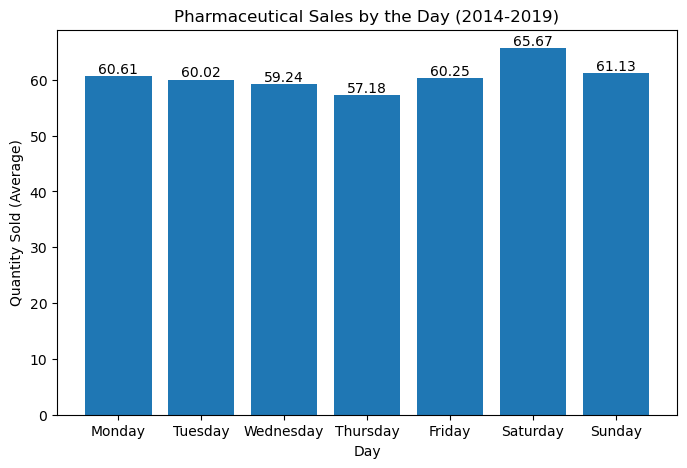

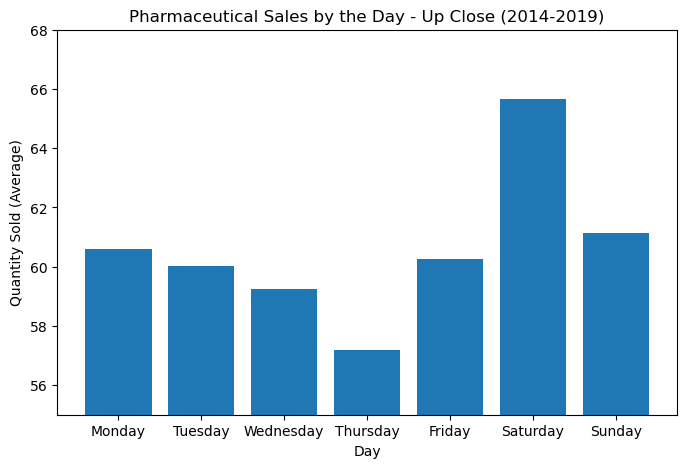

In [100]:
# Bar graph of total sales by the day

# Arrange days in correct order
d_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_daily_df.index = pd.Categorical(avg_daily_df.index, categories=d_order, ordered=True)
avg_daily_df = avg_daily_df.sort_index()

plt.figure(figsize=(8, 5))
day = avg_daily_df.index
avg_daily_sales = avg_daily_df['Total_Sales']
avg_daily_plot = plt.bar(day, avg_daily_sales)

# Add numeric y values
for bar in avg_daily_plot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.title("Pharmaceutical Sales by the Day (2014-2019)")
plt.xlabel("Day")
plt.ylabel("Quantity Sold (Average)")
plt.xticks(day)
plt.show()

# Zoomed in plot
plt.figure(figsize=(8, 5))
avg_daily_plot = plt.bar(day, avg_daily_sales)
plt.title("Pharmaceutical Sales by the Day - Up Close (2014-2019)")
plt.xlabel("Day")
plt.ylabel("Quantity Sold (Average)")
plt.ylim(55,68)
plt.xticks(day)
plt.show()

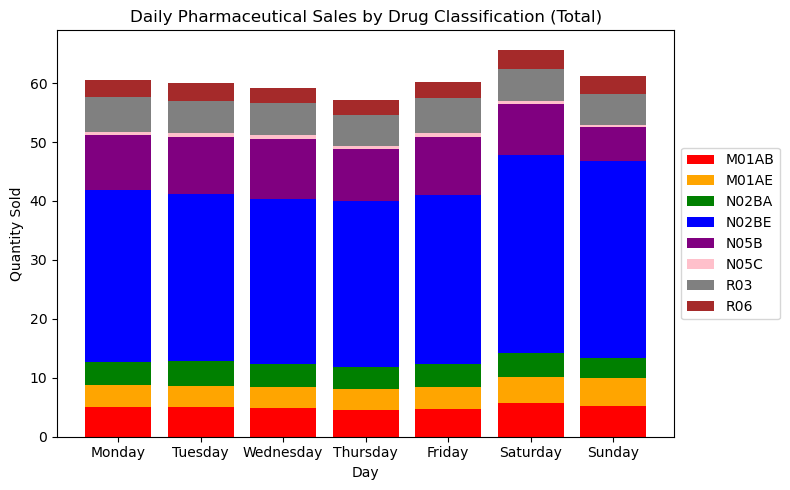

In [101]:
# Stacked bar graph of total sales by the day according to drug classsification

M01AB_daily = avg_daily_df['M01AB']
M01AE_daily = avg_daily_df['M01AE']
N02BA_daily = avg_daily_df['N02BA']
N02BE_daily = avg_daily_df['N02BE']
N05B_daily = avg_daily_df['N05B']
N05C_daily = avg_daily_df['N05C']
R03_daily = avg_daily_df['R03']
R06_daily = avg_daily_df['R06']

plt.figure(figsize=(8, 5))

plt.bar(day, M01AB_daily, color='red')
plt.bar(day, M01AE_daily, bottom=M01AB_daily, color='orange')
plt.bar(day, N02BA_daily, bottom=M01AB_daily+M01AE_daily, color='green')
plt.bar(day, N02BE_daily, bottom=M01AB_daily+M01AE_daily+N02BA_daily, color='blue')
plt.bar(day, N05B_daily, bottom=M01AB_daily+M01AE_daily+N02BA_daily+N02BE_daily, color='purple')
plt.bar(day, N05C_daily, bottom=M01AB_daily+M01AE_daily+N02BA_daily+N02BE_daily+N05B_daily, color='pink')
plt.bar(day, R03_daily, bottom=M01AB_daily+M01AE_daily+N02BA_daily+N02BE_daily+N05B_daily+N05C_daily, color='grey')
plt.bar(day, R06_daily, bottom=M01AB_daily+M01AE_daily+N02BA_daily+N02BE_daily+N05B_daily+N05C_daily+R03_daily, color='brown')
plt.xlabel("Day")
plt.ylabel("Quantity Sold")
plt.legend(["M01AB", "M01AE", "N02BA", "N02BE", "N05B", "N05C", "R03", "R06"], loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Daily Pharmaceutical Sales by Drug Classification (Total)")
plt.tight_layout()
plt.show()

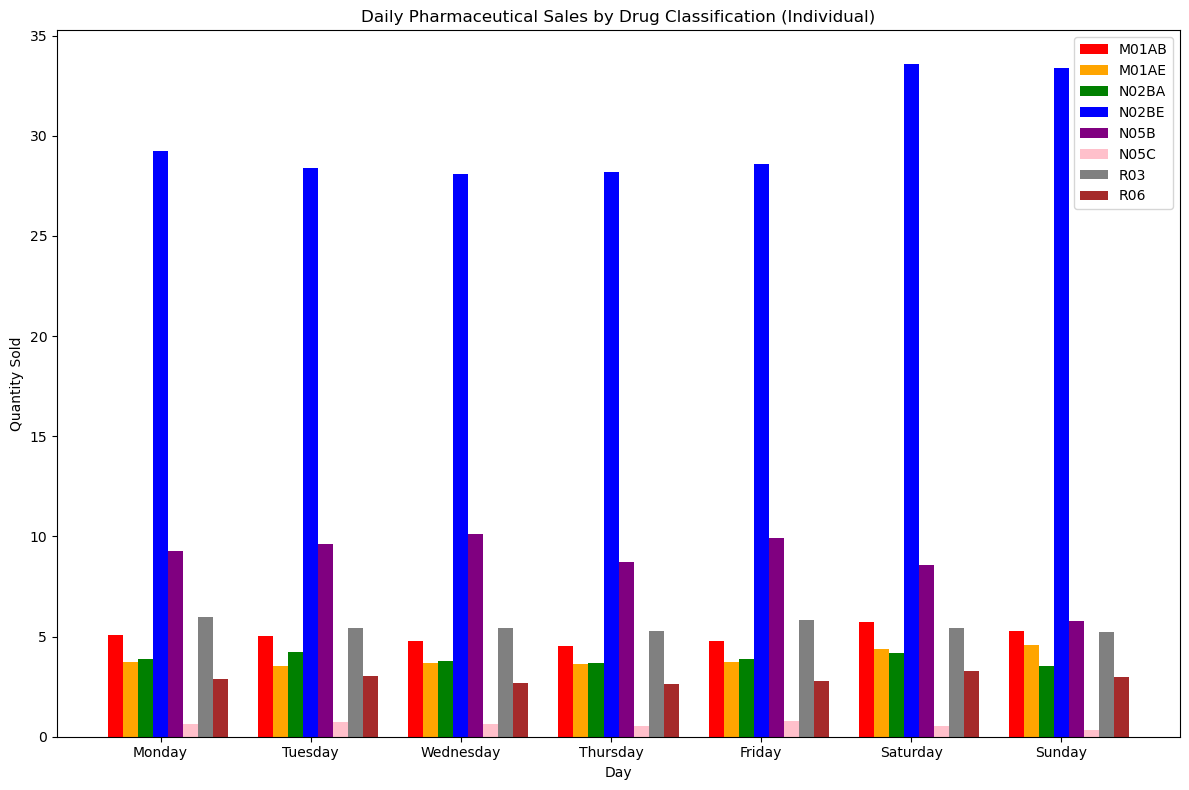

In [102]:
# Grouped bar graph of total sales by the day separated into drug classsifications

n_groups = len(day)
bar_width = 0.1 
index = np.arange(n_groups) 

plt.figure(figsize=(12, 8))

plt.bar(index - 3*bar_width, M01AB_daily, bar_width, label='M01AB', color='red')
plt.bar(index - 2*bar_width, M01AE_daily, bar_width, label='M01AE', color='orange')
plt.bar(index - bar_width, N02BA_daily, bar_width, label='N02BA', color='green')
plt.bar(index, N02BE_daily, bar_width, label='N02BE', color='blue')
plt.bar(index + bar_width, N05B_daily, bar_width, label='N05B', color='purple')
plt.bar(index + 2*bar_width, N05C_daily, bar_width, label='N05C', color='pink')
plt.bar(index + 3*bar_width, R03_daily, bar_width, label='R03', color='grey')
plt.bar(index + 4*bar_width, R06_daily, bar_width, label='R06', color='brown')

plt.xlabel("Day")
plt.ylabel("Quantity Sold")
plt.title("Daily Pharmaceutical Sales by Drug Classification (Individual)")
plt.xticks(index, day)
plt.legend()
plt.tight_layout()
plt.show()

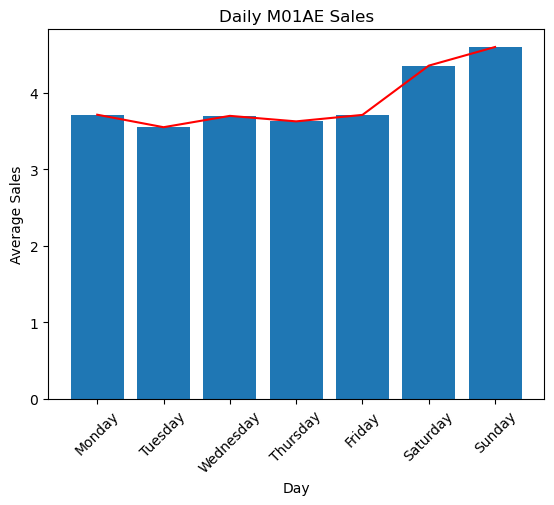

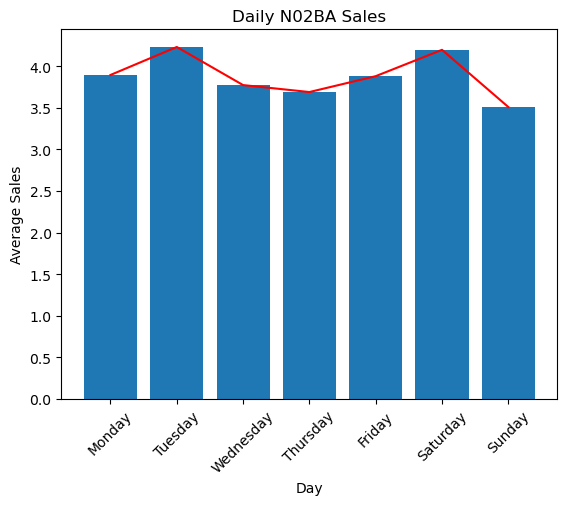

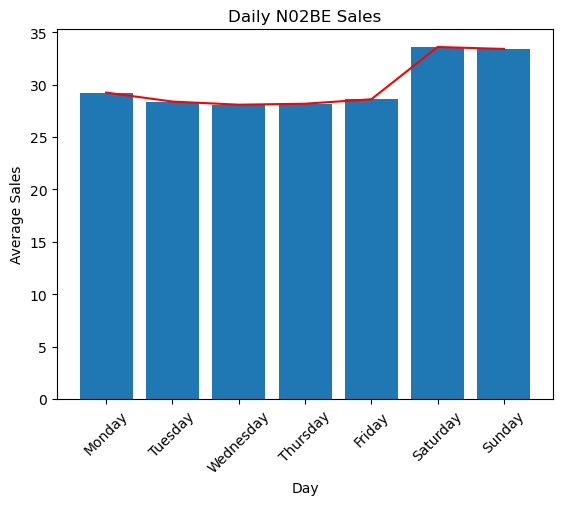

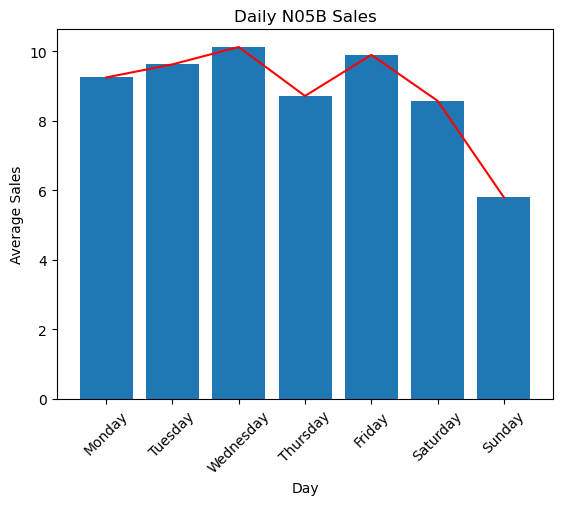

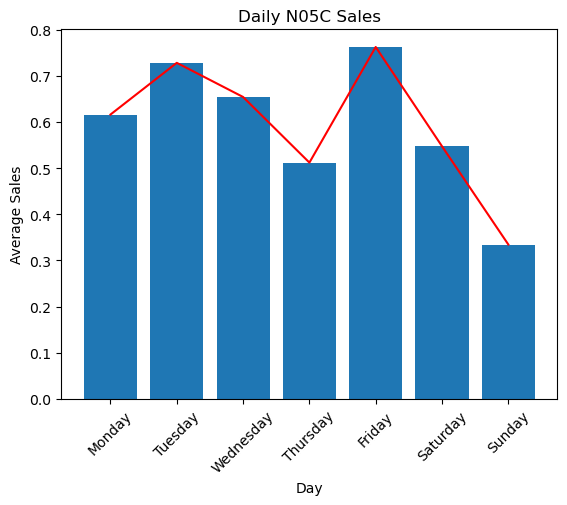

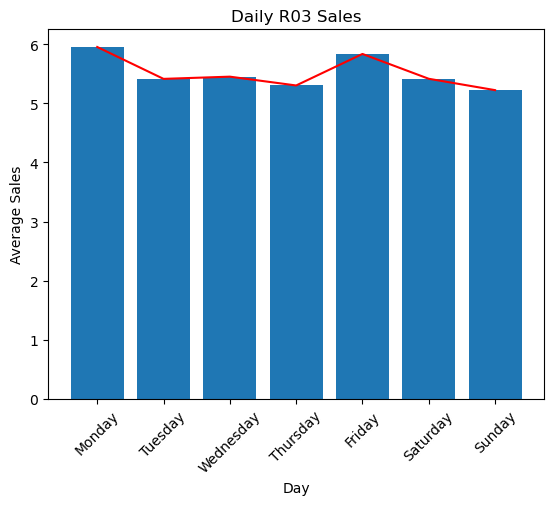

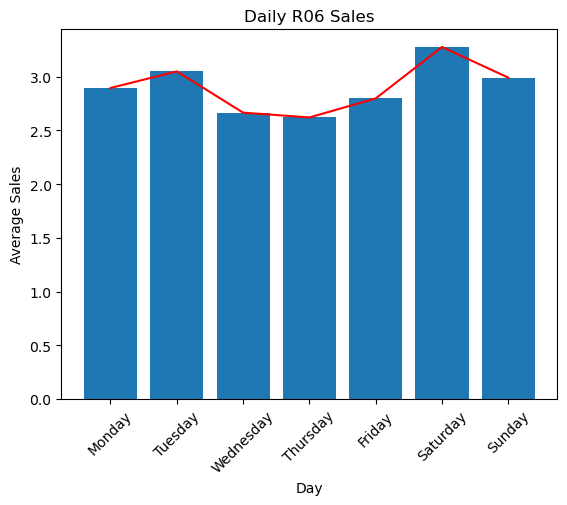

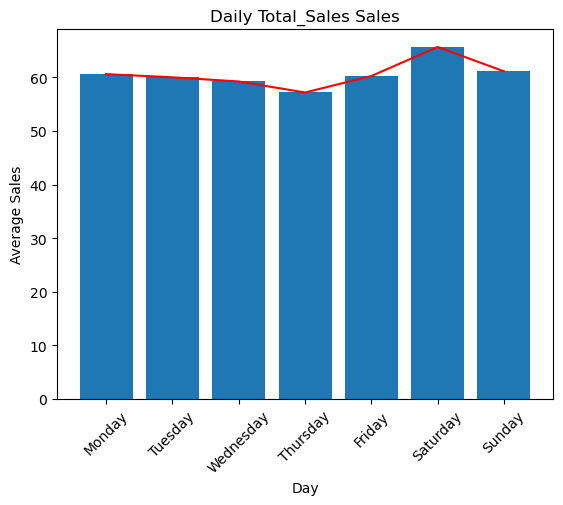

In [136]:
# Individual bar/line graphs of average daily sales per drug classification

def plot_daily(drug):
    day = avg_daily_df.index
    total_sales = avg_daily_df[drug]
    plt.bar(day, total_sales)
    plt.plot(day, total_sales, color='red')
    plt.title(f'Daily {drug} Sales')
    plt.xlabel('Day')
    plt.ylabel('Average Sales')
    plt.xticks(day, rotation=45)
    plt.show()

for i in avg_daily_df.columns[1:9]:
    plot_daily(i) 

In [104]:
# Ranking daily sales in descending order per drug classification

drug_categories = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

for drug in drug_categories:

    daily_drug_df = avg_daily_df.drop(columns=[col for col in avg_daily_df.columns if col not in [drug, 'Total_Sales']])
    
    daily_drug_df['Percentage_of_Total_Sales'] = daily_drug_df[drug] / daily_drug_df['Total_Sales']
    daily_drug_df['Percentage_of_Total_Sales'] = daily_drug_df['Percentage_of_Total_Sales'].map('{:.2%}'.format)
    
    daily_drug_df = daily_drug_df.drop(columns=['Total_Sales'])
    
    daily_drug_df = daily_drug_df.sort_values(drug, ascending=False)

    print(daily_drug_df)
    print("\n")

              M01AB Percentage_of_Total_Sales
Saturday   5.727755                     8.72%
Sunday     5.287175                     8.65%
Monday     5.055736                     8.34%
Tuesday    5.047331                     8.41%
Wednesday  4.797356                     8.10%
Friday     4.770476                     7.92%
Thursday   4.549169                     7.96%


              M01AE Percentage_of_Total_Sales
Sunday     4.601128                     7.53%
Saturday   4.357325                     6.63%
Monday     3.715957                     6.13%
Friday     3.713558                     6.16%
Wednesday  3.700833                     6.25%
Thursday   3.628845                     6.35%
Tuesday    3.552517                     5.92%


              N02BA Percentage_of_Total_Sales
Tuesday    4.229125                     7.05%
Saturday   4.194922                     6.39%
Monday     3.892909                     6.42%
Friday     3.878566                     6.44%
Wednesday  3.771439           

In [105]:
# Ranking M01AB daily sales in descending order
M01AB_daily_df = avg_daily_df.drop(columns=['M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06'])

# Percentage of total sales for each day
M01AB_daily_df['Percentage_of_Total_Sales'] = M01AB_daily_df['M01AB']/M01AB_daily_df['Total_Sales']
M01AB_daily_df['Percentage_of_Total_Sales'] = M01AB_daily_df['Percentage_of_Total_Sales'].map('{:.2%}'.format)

M01AB_daily_df = M01AB_daily_df.drop(columns=['Total_Sales'])
M01AB_daily_df.sort_values('M01AB', ascending=False)

M01AB Percentage_of_Total_Sales
Saturday   5.727755                     8.72%
Sunday     5.287175                     8.65%
Monday     5.055736                     8.34%
Tuesday    5.047331                     8.41%
Wednesday  4.797356                     8.10%
Friday     4.770476                     7.92%
Thursday   4.549169                     7.96%

In [106]:
# Ranking M01AE daily sales in descending order
M01AE_daily_df = avg_daily_df.drop(columns=['M01AB', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06'])

# Percentage of total sales for each day
M01AE_daily_df['Percentage_of_Total_Sales'] = M01AE_daily_df['M01AE']/M01AE_daily_df['Total_Sales']
M01AE_daily_df['Percentage_of_Total_Sales'] = M01AE_daily_df['Percentage_of_Total_Sales'].map('{:.2%}'.format)

M01AE_daily_df = M01AE_daily_df.drop(columns=['Total_Sales'])
M01AE_daily_df.sort_values('M01AE', ascending=False)

M01AE Percentage_of_Total_Sales
Sunday     4.601128                     7.53%
Saturday   4.357325                     6.63%
Monday     3.715957                     6.13%
Friday     3.713558                     6.16%
Wednesday  3.700833                     6.25%
Thursday   3.628845                     6.35%
Tuesday    3.552517                     5.92%

In [107]:
# Ranking N02BA daily sales in descending order
N02BA_daily_df = avg_daily_df.drop(columns=['M01AE', 'M01AB', 'N02BE', 'N05B', 'N05C', 'R03', 'R06'])

# Percentage of total sales for each day
N02BA_daily_df['Percentage_of_Total_Sales'] = N02BA_daily_df['N02BA']/N02BA_daily_df['Total_Sales']
N02BA_daily_df['Percentage_of_Total_Sales'] = N02BA_daily_df['Percentage_of_Total_Sales'].map('{:.2%}'.format)

N02BA_daily_df = N02BA_daily_df.drop(columns=['Total_Sales'])
N02BA_daily_df.sort_values('N02BA', ascending=False)

N02BA Percentage_of_Total_Sales
Tuesday    4.229125                     7.05%
Saturday   4.194922                     6.39%
Monday     3.892909                     6.42%
Friday     3.878566                     6.44%
Wednesday  3.771439                     6.37%
Thursday   3.687832                     6.45%
Sunday     3.507932                     5.74%

In [108]:
# Ranking N02BE daily sales in descending order
N02BE_daily_df = avg_daily_df.drop(columns=['M01AE', 'N02BA', 'M01AB', 'N05B', 'N05C', 'R03', 'R06'])

# Percentage of total sales for each day
N02BE_daily_df['Percentage_of_Total_Sales'] = N02BE_daily_df['N02BE']/N02BE_daily_df['Total_Sales']
N02BE_daily_df['Percentage_of_Total_Sales'] = N02BE_daily_df['Percentage_of_Total_Sales'].map('{:.2%}'.format)

N02BE_daily_df = N02BE_daily_df.drop(columns=['Total_Sales'])
N02BE_daily_df.sort_values('N02BE', ascending=False)

N02BE Percentage_of_Total_Sales
Saturday   33.579719                    51.13%
Sunday     33.392859                    54.62%
Monday     29.232601                    48.23%
Friday     28.591984                    47.46%
Tuesday    28.373665                    47.28%
Thursday   28.168204                    49.26%
Wednesday  28.074514                    47.39%

In [109]:
# Ranking N05B daily sales in descending order
N05B_daily_df = avg_daily_df.drop(columns=['M01AE', 'N02BA', 'N02BE', 'M01AB', 'N05C', 'R03', 'R06'])

# Percentage of total sales for each day
N05B_daily_df['Percentage_of_Total_Sales'] = N05B_daily_df['N05B']/N05B_daily_df['Total_Sales']
N05B_daily_df['Percentage_of_Total_Sales'] = N05B_daily_df['Percentage_of_Total_Sales'].map('{:.2%}'.format)

N05B_daily_df = N05B_daily_df.drop(columns=['Total_Sales'])
N05B_daily_df.sort_values('N05B', ascending=False)

N05B Percentage_of_Total_Sales
Wednesday  10.123944                    17.09%
Friday      9.897785                    16.43%
Tuesday     9.623810                    16.04%
Monday      9.246899                    15.26%
Thursday    8.715712                    15.24%
Saturday    8.574557                    13.06%
Sunday      5.796899                     9.48%

In [110]:
# Ranking N05C daily sales in descending order
N05C_daily_df = avg_daily_df.drop(columns=['M01AE', 'N02BA', 'N02BE', 'N05B', 'M01AB', 'R03', 'R06'])

# Percentage of total sales for each day
N05C_daily_df['Percentage_of_Total_Sales'] = N05C_daily_df['N05C']/N05C_daily_df['Total_Sales']
N05C_daily_df['Percentage_of_Total_Sales'] = N05C_daily_df['Percentage_of_Total_Sales'].map('{:.2%}'.format)

N05C_daily_df = N05C_daily_df.drop(columns=['Total_Sales'])
N05C_daily_df.sort_values('N05C', ascending=False)

N05C Percentage_of_Total_Sales
Friday     0.762458                     1.27%
Tuesday    0.728128                     1.21%
Wednesday  0.654167                     1.10%
Monday     0.616141                     1.02%
Saturday   0.547342                     0.83%
Thursday   0.512043                     0.90%
Sunday     0.334579                     0.55%

In [111]:
# Ranking R03 daily sales in descending order
R03_daily_df = avg_daily_df.drop(columns=['M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'M01AB', 'R06'])

# Percentage of total sales for each day
R03_daily_df['Percentage_of_Total_Sales'] = R03_daily_df['R03']/R03_daily_df['Total_Sales']
R03_daily_df['Percentage_of_Total_Sales'] = R03_daily_df['Percentage_of_Total_Sales'].map('{:.2%}'.format)

R03_daily_df = R03_daily_df.drop(columns=['Total_Sales'])
R03_daily_df.sort_values('R03', ascending=False)

R03 Percentage_of_Total_Sales
Monday     5.951689                     9.82%
Friday     5.834025                     9.68%
Wednesday  5.450000                     9.20%
Saturday   5.414175                     8.24%
Tuesday    5.412618                     9.02%
Thursday   5.301080                     9.27%
Sunday     5.222038                     8.54%

In [112]:
# Ranking R06 daily sales in descending order
R06_daily_df = avg_daily_df.drop(columns=['M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'M01AB'])

# Percentage of total sales for each day
R06_daily_df['Percentage_of_Total_Sales'] = R06_daily_df['R06']/R06_daily_df['Total_Sales']
R06_daily_df['Percentage_of_Total_Sales'] = R06_daily_df['Percentage_of_Total_Sales'].map('{:.2%}'.format)

R06_daily_df = R06_daily_df.drop(columns=['Total_Sales'])
R06_daily_df.sort_values('R06', ascending=False)

R06 Percentage_of_Total_Sales
Saturday   3.277276                     4.99%
Tuesday    3.050238                     5.08%
Sunday     2.991733                     4.89%
Monday     2.895432                     4.78%
Friday     2.798627                     4.65%
Wednesday  2.666172                     4.50%
Thursday   2.621132                     4.58%

# Weekly Sales

In [113]:
weekly_df.head()

datum  M01AB  M01AE  N02BA   N02BE  N05B  N05C   R03   R06
0   1/5/2014  14.00  11.67   21.3  185.95  41.0   0.0  32.0   7.0
1  1/12/2014  29.33  12.68   37.9  190.70  88.0   5.0  21.0   7.2
2  1/19/2014  30.67  26.34   45.9  218.40  80.0   8.0  29.0  12.0
3  1/26/2014  34.00  32.37   31.5  179.60  80.0   8.0  23.0  10.0
4   2/2/2014  31.02  23.35   20.7  159.88  84.0  12.0  29.0  12.0

# Monthly Sales
    - Total Pharmaceutical Sales by the Month (plot)
    - Total Pharmaceutical Sales by Drug Classification per Month (plot)
    - Pharmaceutical Sales by Drug Classification per Month (plot)
    - Individual Drug Classification Monthly Sales/Percentage of Total Monthly Sales (tables)

In [114]:
monthly_df.head()

datum   M01AB    M01AE    N02BA     N02BE   N05B  N05C    R03    R06
0  2014-01-31  127.69   99.090  152.100   878.030  354.0  50.0  112.0   48.2
1  2014-02-28  133.32  126.050  177.000  1001.900  347.0  31.0  122.0   36.2
2  2014-03-31  137.44   92.950  147.655   779.275  232.0  20.0  112.0   85.4
3  2014-04-30  113.10   89.475  130.900   698.500  209.0  18.0   97.0   73.7
4  2014-05-31  101.79  119.933  132.100   628.780  270.0  23.0  107.0  123.7

In [115]:
monthly_df.dtypes

datum     object
M01AB    float64
M01AE    float64
N02BA    float64
N02BE    float64
N05B     float64
N05C     float64
R03      float64
R06      float64
dtype: object

In [116]:
# Extract month from date
monthly_df['datum'] = pd.to_datetime(monthly_df['datum'])
monthly_df['month'] = monthly_df['datum'].dt.month_name()
monthly_df.head()

datum   M01AB    M01AE    N02BA     N02BE   N05B  N05C    R03    R06  \
0 2014-01-31  127.69   99.090  152.100   878.030  354.0  50.0  112.0   48.2   
1 2014-02-28  133.32  126.050  177.000  1001.900  347.0  31.0  122.0   36.2   
2 2014-03-31  137.44   92.950  147.655   779.275  232.0  20.0  112.0   85.4   
3 2014-04-30  113.10   89.475  130.900   698.500  209.0  18.0   97.0   73.7   
4 2014-05-31  101.79  119.933  132.100   628.780  270.0  23.0  107.0  123.7   

      month  
0   January  
1  February  
2     March  
3     April  
4       May

In [117]:
# Clean DataFrame

# Drop unrelated columns
drop_monthly_df = monthly_df.drop(columns=['datum'])

# Calculate total sales
drop_monthly_df["Total_Sales"] = drop_monthly_df['M01AB'] + drop_monthly_df['M01AE'] + drop_monthly_df['N02BA'] + drop_monthly_df['N02BE'] + drop_monthly_df['N05B'] + drop_monthly_df['N05C'] + drop_monthly_df['R03'] + drop_monthly_df['R06']
drop_monthly_df["Total_Sales"] = drop_monthly_df["Total_Sales"].astype("float")

# Group by month
avg_monthly_df = drop_monthly_df.groupby(["month"]).mean()

# Arrange months in correct order
m_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
avg_monthly_df.index = pd.Categorical(avg_monthly_df.index, categories=m_order, ordered=True)
avg_monthly_df = avg_monthly_df.sort_index()

avg_monthly_df

M01AB       M01AE       N02BA        N02BE        N05B  \
January    124.538333  114.939667  111.075000  1032.255167  265.033333   
February   137.436667  127.632333  127.480000   993.825000  248.400000   
March      152.275000  123.143667  123.809167   927.916333  256.233333   
April      153.538333  107.703167  112.316667   776.815667  239.900000   
May        150.231667  113.136000  115.190000   714.663333  235.300000   
June       141.443333  107.036667  115.951667   624.251000  242.500000   
July       164.581667  117.022500  107.983333   610.265000  257.266667   
August     169.945000  112.355333  107.791667   654.821000  281.666667   
September  150.146667  119.095667  102.891667   960.856000  277.216667   
October    144.006667  118.327500  115.841667  1276.200000  267.500000   
November   160.436000  114.242000  125.810000   985.452000  281.440000   
December   153.680000  124.487000  116.084800  1223.894800  303.000000   

                N05C         R03         R06  Total_Sales  
January    22.000000  178.041667   39.583333  1887.466500  
February   15.166667  195.166667   46.726667  1891.834000  
March      19.333333  204.166667   98.723333  1905.600833  
April      15.500000  184.500000  141.116667  1731.390500  
May        18.833333  163.333333  155.091667  1665.779333  
June       17.666667  130.500000  133.106667  1512.456000  
July       14.833333   91.666667  104.121667  1467.740833  
August     19.000000   96.166667   83.383333  1525.129667  
September  15.666667  138.666667   77.200000  1841.740000  
October    16.000000  203.833333   57.738333  2199.447500  
November   20.200000  192.800000   47.080000  1927.460000  
December   20.800000  251.400000   42.046000  2235.392600

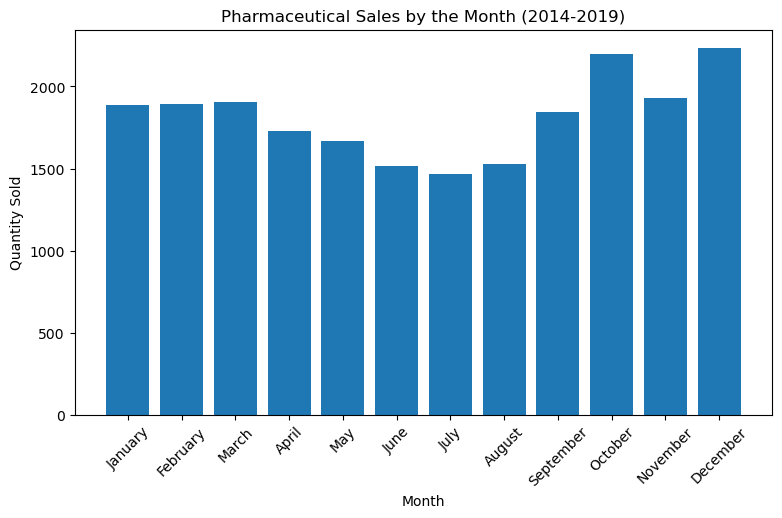

In [118]:
# Bar graph of total sales by the month

month = avg_monthly_df.index
total_monthly_sales = avg_monthly_df['Total_Sales']
plt.figure(figsize=(9, 5))
total_monthly_plot = plt.bar(month, total_monthly_sales)
plt.title("Pharmaceutical Sales by the Month (2014-2019)")
plt.xlabel("Month")
plt.ylabel("Quantity Sold")
plt.xticks(month, rotation=45)
plt.show()

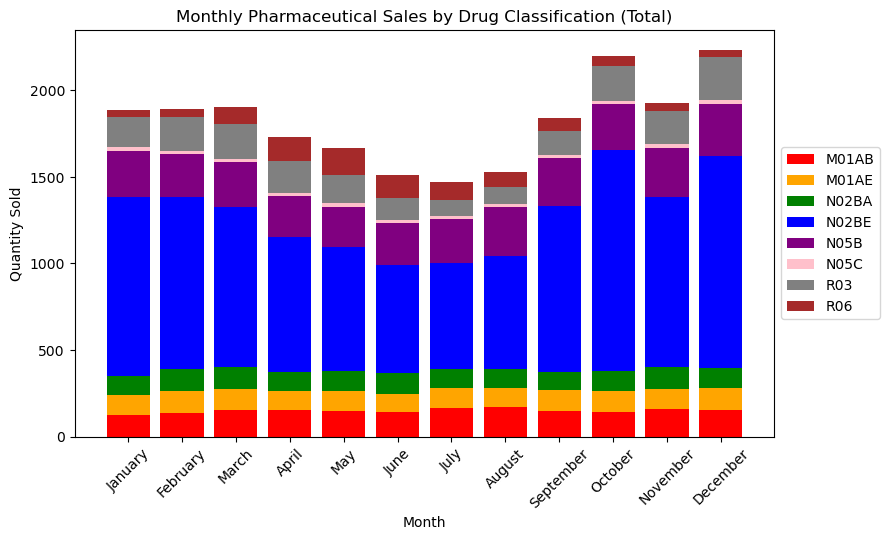

In [119]:
# Stacked bar graph of total sales by the month according to drug classsification

M01AB_monthly = avg_monthly_df['M01AB']
M01AE_monthly = avg_monthly_df['M01AE']
N02BA_monthly = avg_monthly_df['N02BA']
N02BE_monthly = avg_monthly_df['N02BE']
N05B_monthly = avg_monthly_df['N05B']
N05C_monthly = avg_monthly_df['N05C']
R03_monthly = avg_monthly_df['R03']
R06_monthly = avg_monthly_df['R06']

plt.figure(figsize=(9, 5))

plt.bar(month, M01AB_monthly, color='red')
plt.bar(month, M01AE_monthly, bottom=M01AB_monthly, color='orange')
plt.bar(month, N02BA_monthly, bottom=M01AB_monthly+M01AE_monthly, color='green')
plt.bar(month, N02BE_monthly, bottom=M01AB_monthly+M01AE_monthly+N02BA_monthly, color='blue')
plt.bar(month, N05B_monthly, bottom=M01AB_monthly+M01AE_monthly+N02BA_monthly+N02BE_monthly, color='purple')
plt.bar(month, N05C_monthly, bottom=M01AB_monthly+M01AE_monthly+N02BA_monthly+N02BE_monthly+N05B_monthly, color='pink')
plt.bar(month, R03_monthly, bottom=M01AB_monthly+M01AE_monthly+N02BA_monthly+N02BE_monthly+N05B_monthly+N05C_monthly, color='grey')
plt.bar(month, R06_monthly, bottom=M01AB_monthly+M01AE_monthly+N02BA_monthly+N02BE_monthly+N05B_monthly+N05C_monthly+R03_monthly, color='brown')
plt.xlabel("Month")
plt.ylabel("Quantity Sold")
plt.legend(["M01AB", "M01AE", "N02BA", "N02BE", "N05B", "N05C", "R03", "R06"], loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Monthly Pharmaceutical Sales by Drug Classification (Total)")
plt.tight_layout()
plt.xticks(month, rotation=45)
plt.show()

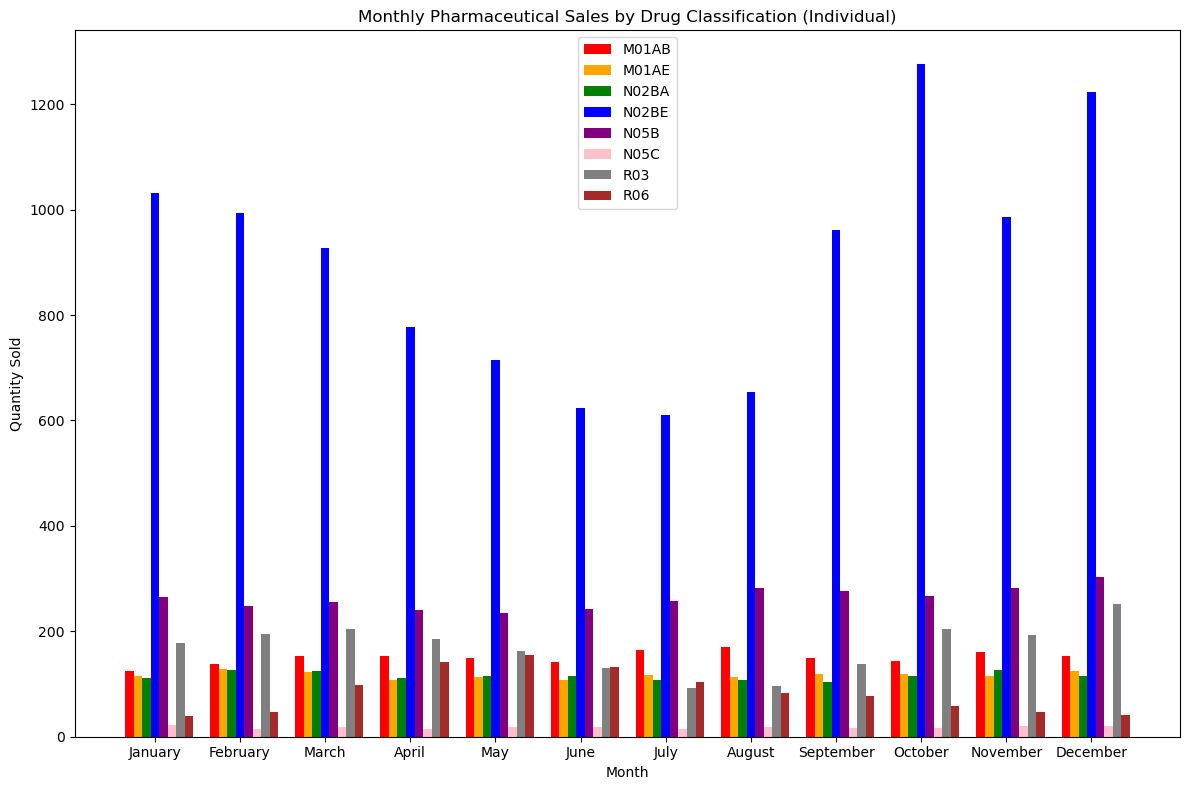

In [120]:
# Grouped bar graph of total sales by the month separated into drug classsifications

n_groups = len(month)
bar_width = 0.1 
index = np.arange(n_groups) 

plt.figure(figsize=(12, 8))

plt.bar(index - 3*bar_width, M01AB_monthly, bar_width, label='M01AB', color='red')
plt.bar(index - 2*bar_width, M01AE_monthly, bar_width, label='M01AE', color='orange')
plt.bar(index - bar_width, N02BA_monthly, bar_width, label='N02BA', color='green')
plt.bar(index, N02BE_monthly, bar_width, label='N02BE', color='blue')
plt.bar(index + bar_width, N05B_monthly, bar_width, label='N05B', color='purple')
plt.bar(index + 2*bar_width, N05C_monthly, bar_width, label='N05C', color='pink')
plt.bar(index + 3*bar_width, R03_monthly, bar_width, label='R03', color='grey')
plt.bar(index + 4*bar_width, R06_monthly, bar_width, label='R06', color='brown')

plt.xlabel("Month")
plt.ylabel("Quantity Sold")
plt.title("Monthly Pharmaceutical Sales by Drug Classification (Individual)")
plt.xticks(index, month)
plt.legend()
plt.tight_layout()
plt.show()

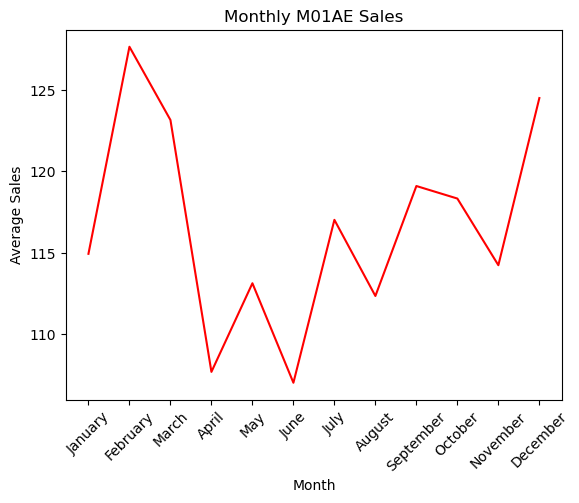

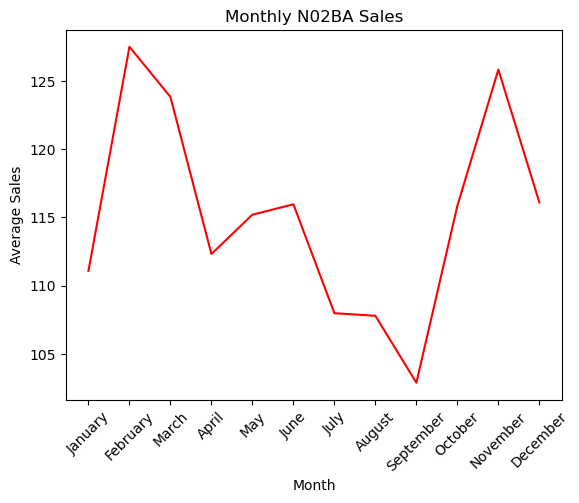

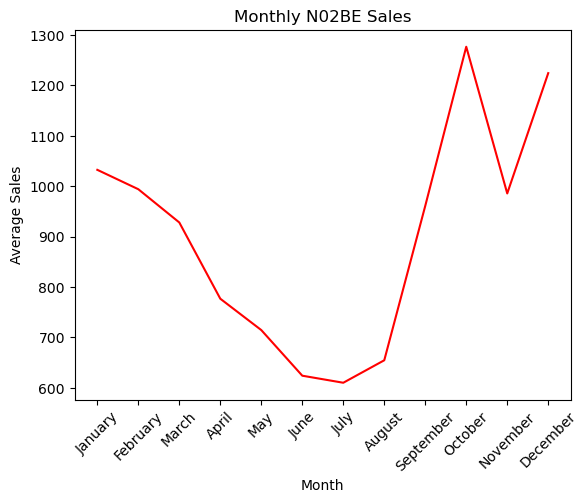

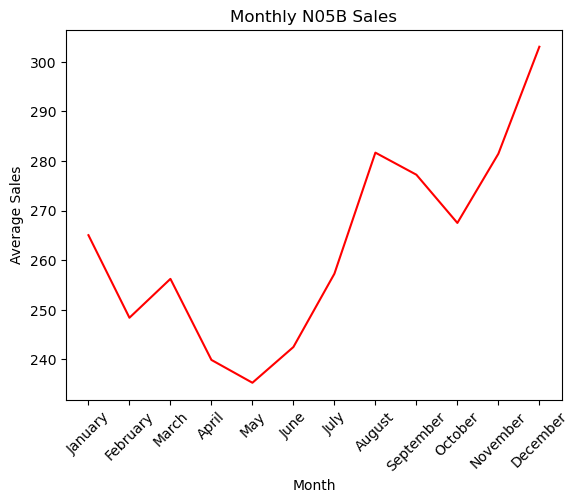

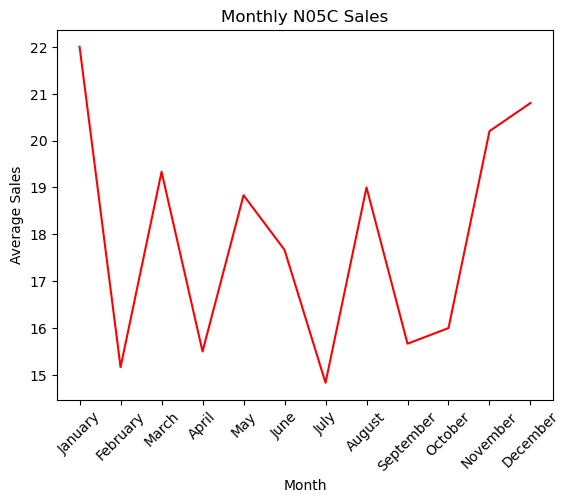

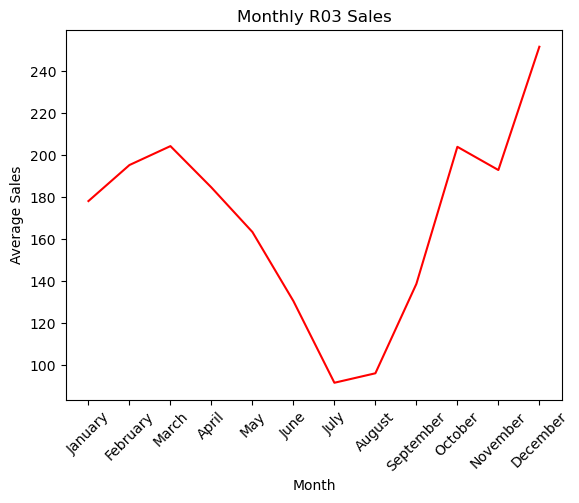

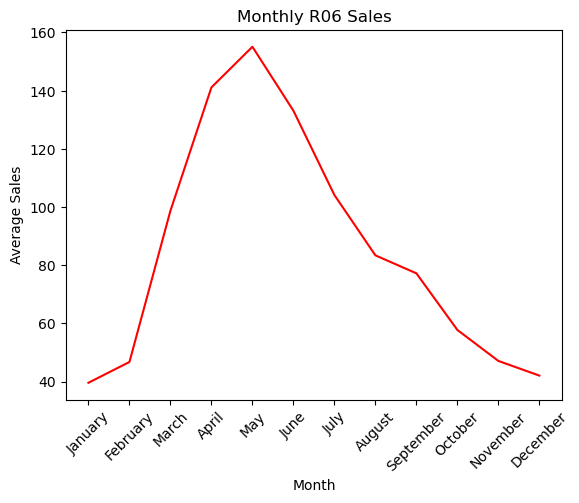

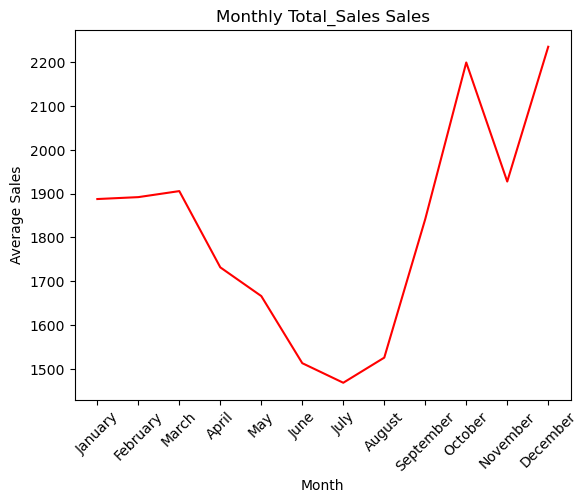

In [121]:
# Individual line graphs of average hourly sales per drug classification

def plot_monthly(drug):
    month = avg_monthly_df.index
    total_sales = avg_monthly_df[drug]
    # plt.bar(month, total_sales)
    plt.plot(month, total_sales, color='red')
    plt.title(f'Monthly {drug} Sales')
    plt.xlabel('Month')
    plt.ylabel('Average Sales')
    plt.xticks(month, rotation=45)
    plt.show()

for i in avg_monthly_df.columns[1:9]:
    plot_monthly(i) 

In [122]:
# Ranking monthly sales in descending order per drug classification

drug_categories = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

for drug in drug_categories:

    monthly_drug_df = avg_monthly_df.drop(columns=[col for col in avg_monthly_df.columns if col not in [drug, 'Total_Sales']])
    
    monthly_drug_df['Percentage_of_Total_Sales'] = monthly_drug_df[drug] / monthly_drug_df['Total_Sales']
    monthly_drug_df['Percentage_of_Total_Sales'] = monthly_drug_df['Percentage_of_Total_Sales'].map('{:.2%}'.format)
    
    monthly_drug_df = monthly_drug_df.drop(columns=['Total_Sales'])
    
    monthly_drug_df = monthly_drug_df.sort_values(drug, ascending=False)

    print(monthly_drug_df)
    print("\n")

                M01AB Percentage_of_Total_Sales
August     169.945000                    11.14%
July       164.581667                    11.21%
November   160.436000                     8.32%
December   153.680000                     6.87%
April      153.538333                     8.87%
March      152.275000                     7.99%
May        150.231667                     9.02%
September  150.146667                     8.15%
October    144.006667                     6.55%
June       141.443333                     9.35%
February   137.436667                     7.26%
January    124.538333                     6.60%


                M01AE Percentage_of_Total_Sales
February   127.632333                     6.75%
December   124.487000                     5.57%
March      123.143667                     6.46%
September  119.095667                     6.47%
October    118.327500                     5.38%
July       117.022500                     7.97%
January    114.939667                 

# Yearly Sales
  - Yearly pharmaceutiical sales by drug classifcation (plots)
  - Total hourly pharmaceutical sales analogized from year to year (plot)
  - Total monthly pharmaceutical sales analogized from year to year (plot)
  - Monthly pharmaceutical sales analogized from year to year by drug classification (plots)
  - Total daily pharmaceutical sales analogized from year to year (plot)
  - Daily pharmaceutical sales analogized from year to year by drug classification (plots)

In [123]:
# Use monthly data to compare drug sales by year only

yr_month_df = monthly_df.copy()
yr_month_df['Year'] = yr_month_df['datum'].dt.year
yr_month_df.set_index(yr_month_df['datum'], inplace= True)
yr_month_df.head()

datum   M01AB    M01AE    N02BA     N02BE   N05B  N05C    R03  \
datum                                                                           
2014-01-31 2014-01-31  127.69   99.090  152.100   878.030  354.0  50.0  112.0   
2014-02-28 2014-02-28  133.32  126.050  177.000  1001.900  347.0  31.0  122.0   
2014-03-31 2014-03-31  137.44   92.950  147.655   779.275  232.0  20.0  112.0   
2014-04-30 2014-04-30  113.10   89.475  130.900   698.500  209.0  18.0   97.0   
2014-05-31 2014-05-31  101.79  119.933  132.100   628.780  270.0  23.0  107.0   

              R06     month  Year  
datum                              
2014-01-31   48.2   January  2014  
2014-02-28   36.2  February  2014  
2014-03-31   85.4     March  2014  
2014-04-30   73.7     April  2014  
2014-05-31  123.7       May  2014

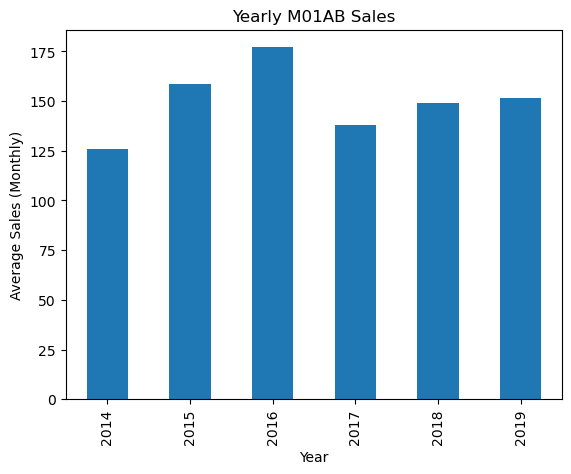

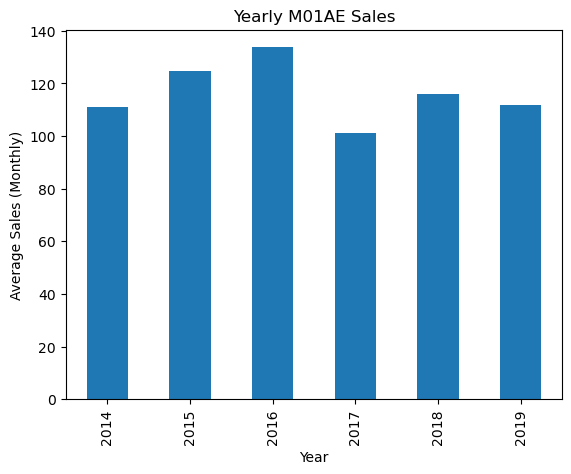

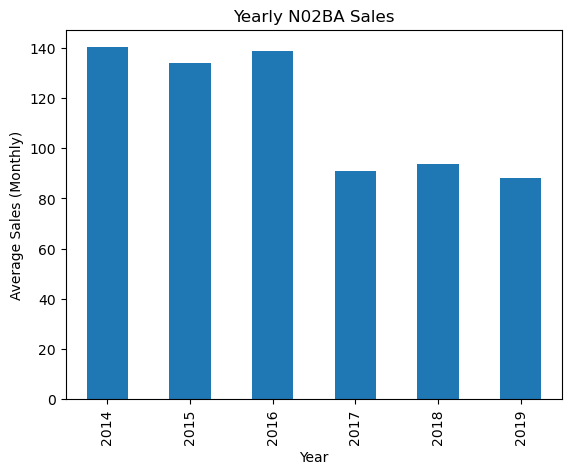

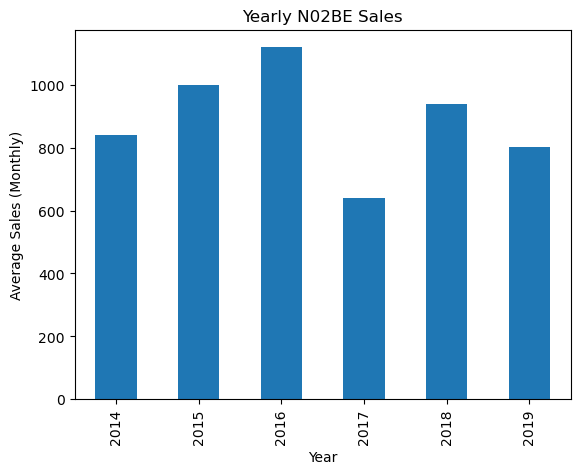

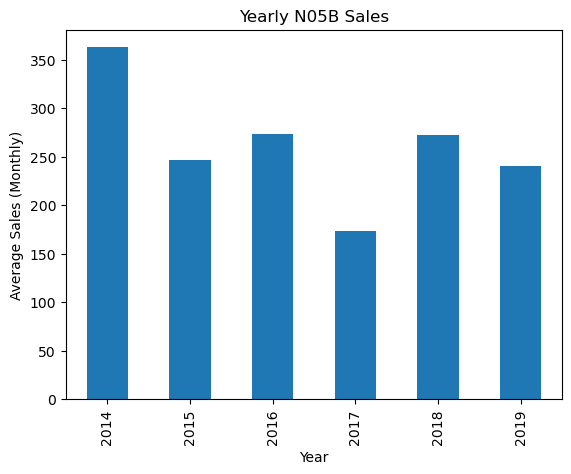

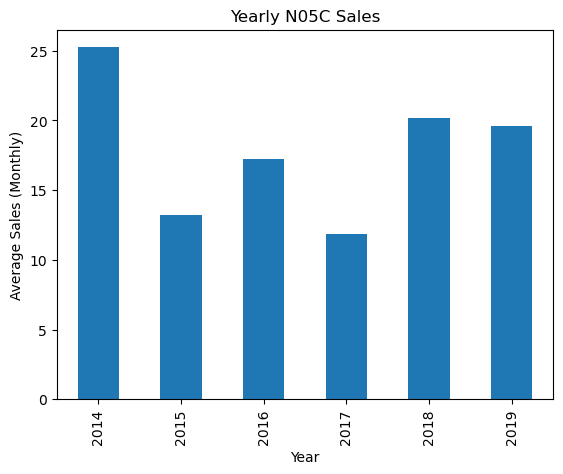

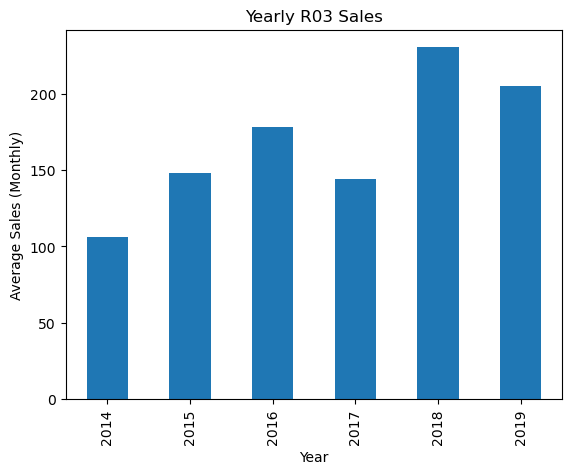

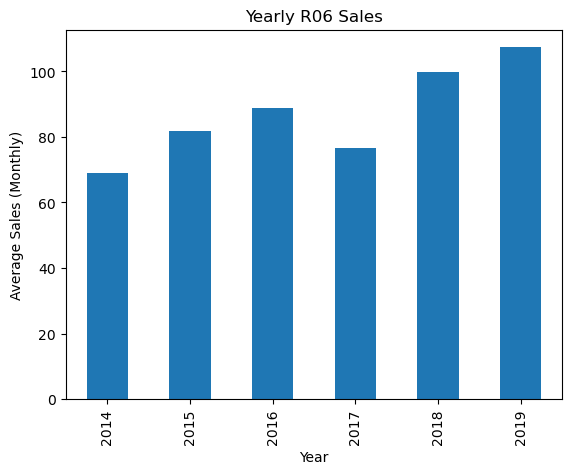

In [124]:
# Individual bar graphs of yearly sales per drug classification

def plot_yearly(drug):
    yr_month_df.groupby('Year')[drug].mean().plot.bar()
    plt.title(f'Yearly {drug} Sales')
    plt.xlabel('Year')
    plt.ylabel('Average Sales (Monthly)')
    plt.show()

for i in yr_month_df.columns[1:9]:
    plot_yearly(i) 

In [125]:
# Clean DataFrame
yearly_df = hourly_df.drop(columns=['datum'])
yearly_df.rename(columns={"Weekday Name": "Day"}, inplace = True)
yearly_df['Year'] = yearly_df['Year'].map(str)
yearly_df['Month'] = yearly_df['Month'].map(str)

# Calculate total sales
yearly_df["Total_Sales"] = yearly_df['M01AB'] + yearly_df['M01AE'] + yearly_df['N02BA'] + yearly_df['N02BE'] + yearly_df['N05B'] + yearly_df['N05C'] + yearly_df['R03'] + yearly_df['R06']
yearly_df["Total_Sales"] = yearly_df["Total_Sales"].astype("float")

yearly_df.head()

# yr_2014_df = yearly_df.loc[yearly_df['Year'] == 2014]
# yr_2015_df = yearly_df.loc[yearly_df['Year'] == 2015]
# yr_2016_df = yearly_df.loc[yearly_df['Year'] == 2016]
# yr_2017_df = yearly_df.loc[yearly_df['Year'] == 2017]
# yr_2018_df = yearly_df.loc[yearly_df['Year'] == 2018]
# yr_2019_df = yearly_df.loc[yearly_df['Year'] == 2019]

M01AB  M01AE  N02BA  N02BE  N05B  N05C  R03  R06  Year Month  Hour  \
0    0.0   0.67    0.4    2.0   0.0   0.0  0.0  1.0  2014     1     8   
1    0.0   0.00    1.0    0.0   2.0   0.0  0.0  0.0  2014     1     9   
2    0.0   0.00    0.0    3.0   2.0   0.0  0.0  0.0  2014     1    10   
3    0.0   0.00    0.0    2.0   1.0   0.0  0.0  0.0  2014     1    11   
4    0.0   2.00    0.0    5.0   2.0   0.0  0.0  0.0  2014     1    12   

        Day  Total_Sales  
0  Thursday         4.07  
1  Thursday         3.00  
2  Thursday         5.00  
3  Thursday         3.00  
4  Thursday         9.00

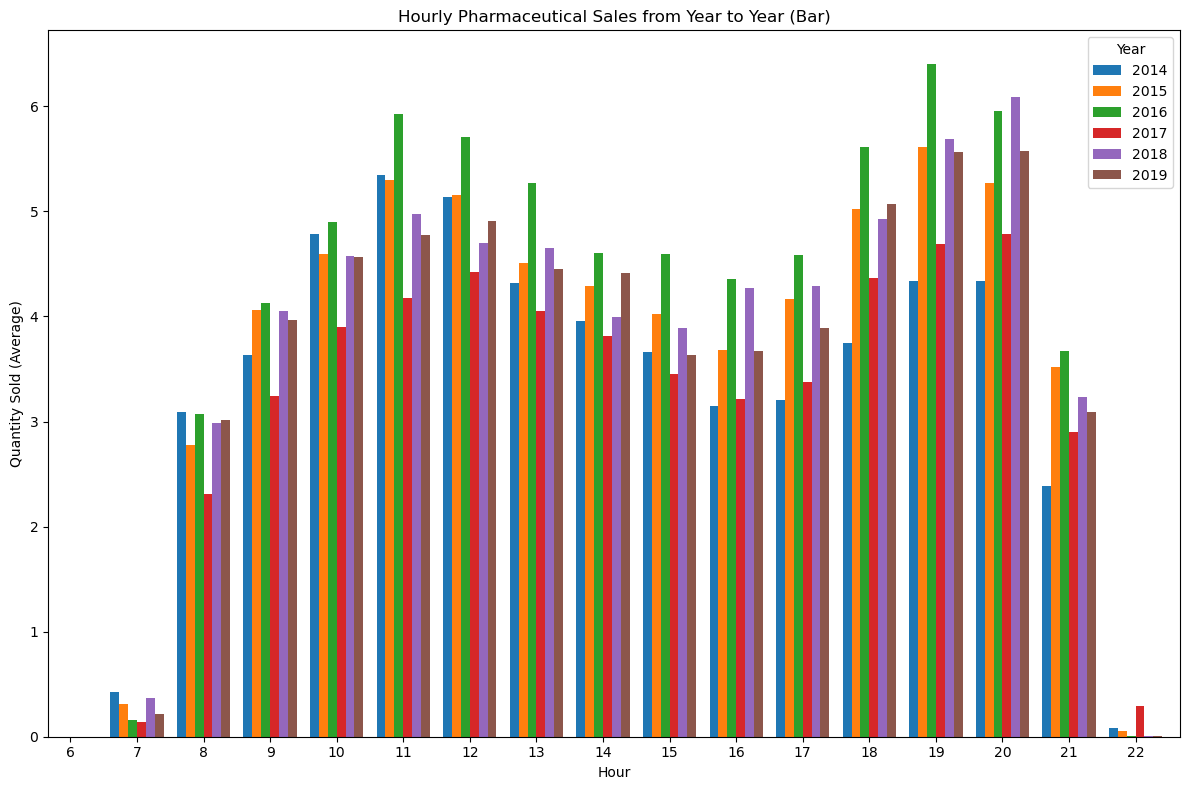

In [126]:
# Grouped bar graph of total hourly sales separated by year

# Use pivot table to group by, reshape, aggregate
pivot_df = yearly_df.pivot_table(index=['Hour'], columns='Year', values='Total_Sales', aggfunc='mean')

fig, ax = plt.subplots(figsize=(12, 8))

n_years = len(pivot_df.columns)
width = 0.8/n_years
index = np.arange(len(pivot_df))

for i, year in enumerate(pivot_df.columns):
    ax.bar(index + i * width, pivot_df[year], width, label=year)

ax.set_xlabel('Hour')
ax.set_ylabel('Quantity Sold (Average)')
ax.set_title('Hourly Pharmaceutical Sales from Year to Year (Bar)')
ax.set_xticks(index + width * (n_years / 2 - 0.5))
ax.set_xticklabels(pivot_df.index)
ax.legend(title='Year')

plt.xlim(6,23)
plt.tight_layout()
plt.show()

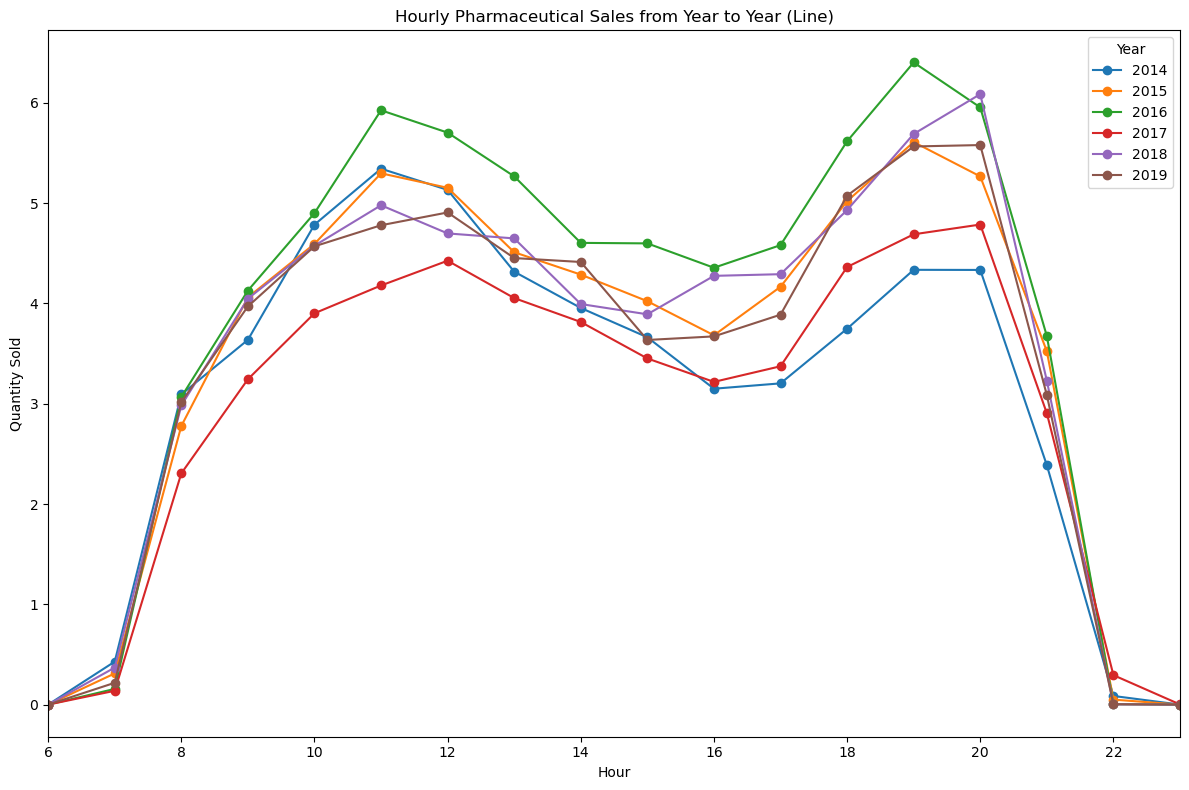

In [127]:
# Grouped line graph of total hourly sales separated by year

fig, ax = plt.subplots(figsize=(12, 8))

for year in pivot_df.columns:
    ax.plot(pivot_df.index, pivot_df[year], marker='o', label=str(year))

ax.set_xlabel('Hour')
ax.set_ylabel('Quantity Sold')
ax.set_title('Hourly Pharmaceutical Sales from Year to Year (Line)')
ax.legend(title='Year')

plt.xlim(6,23)
plt.tight_layout()
plt.show()

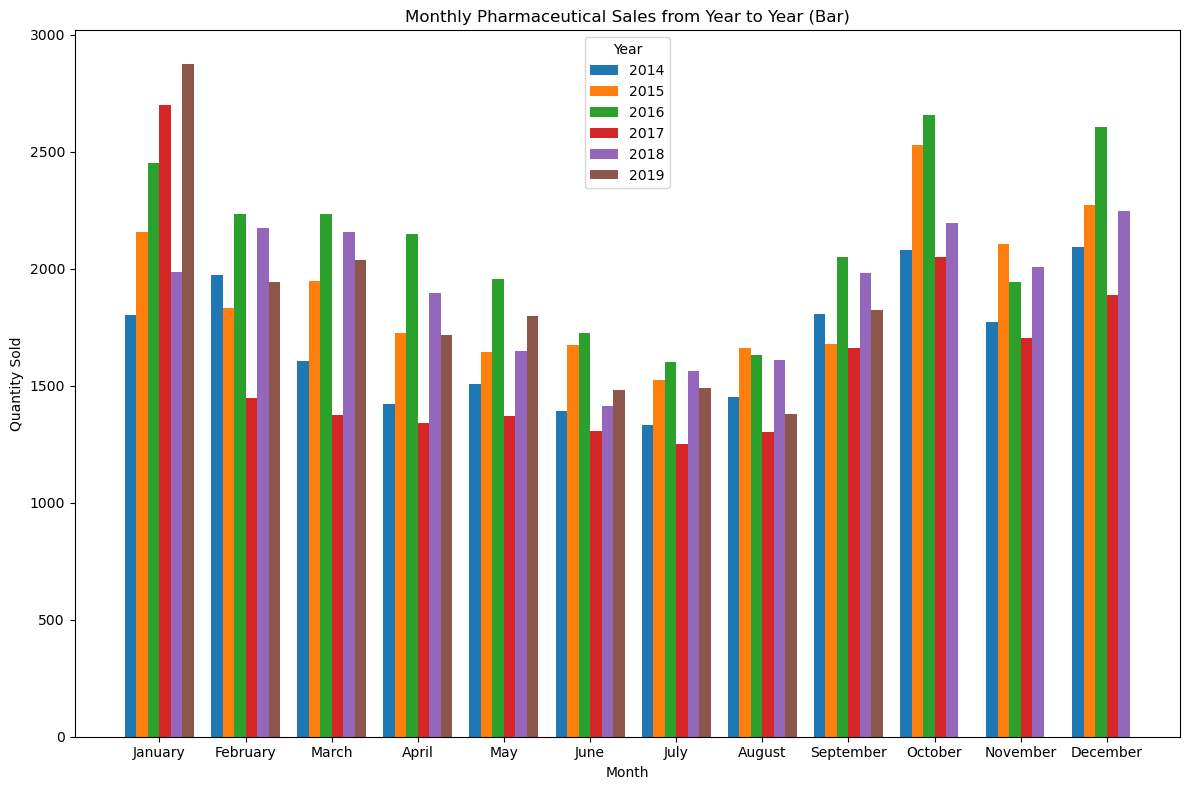

In [128]:
# Convert numeric values to month names and arrange in correct order
yearly_df['Month'] = yearly_df['Month'].replace({'1':'January', '2':'February', '3':'March','4':'April','5':'May','6':'June','7':'July','8':'August','9':'September','10':'October','11':'November','12':'December'})
yearly_df['Month'] = pd.Categorical(yearly_df['Month'], categories=m_order, ordered=True)
yearly_df = yearly_df.sort_index()

# Grouped bar graph of total monthly sales separated by year

# Group by, reshape, aggregate
pivot_df2 = yearly_df.pivot_table(index=['Month'], columns='Year', values='Total_Sales', aggfunc='sum')

# Replace remaining 2019 months of no/incomplete data with NaN so its not plotted
pivot_df2.loc[['October', 'November', 'December'], ['2019']] = np.nan

fig, ax = plt.subplots(figsize=(12, 8))

n_years = len(pivot_df2.columns)
width = 0.8/n_years
index = np.arange(len(pivot_df2))

for i, year in enumerate(pivot_df2.columns):
    ax.bar(index + i * width, pivot_df2[year], width, label=year)

ax.set_xlabel('Month')
ax.set_ylabel('Quantity Sold')
ax.set_title('Monthly Pharmaceutical Sales from Year to Year (Bar)')
ax.set_xticks(index + width * (n_years / 2 - 0.5))
ax.set_xticklabels(pivot_df2.index)
ax.legend(title='Year')

plt.tight_layout()
plt.show()

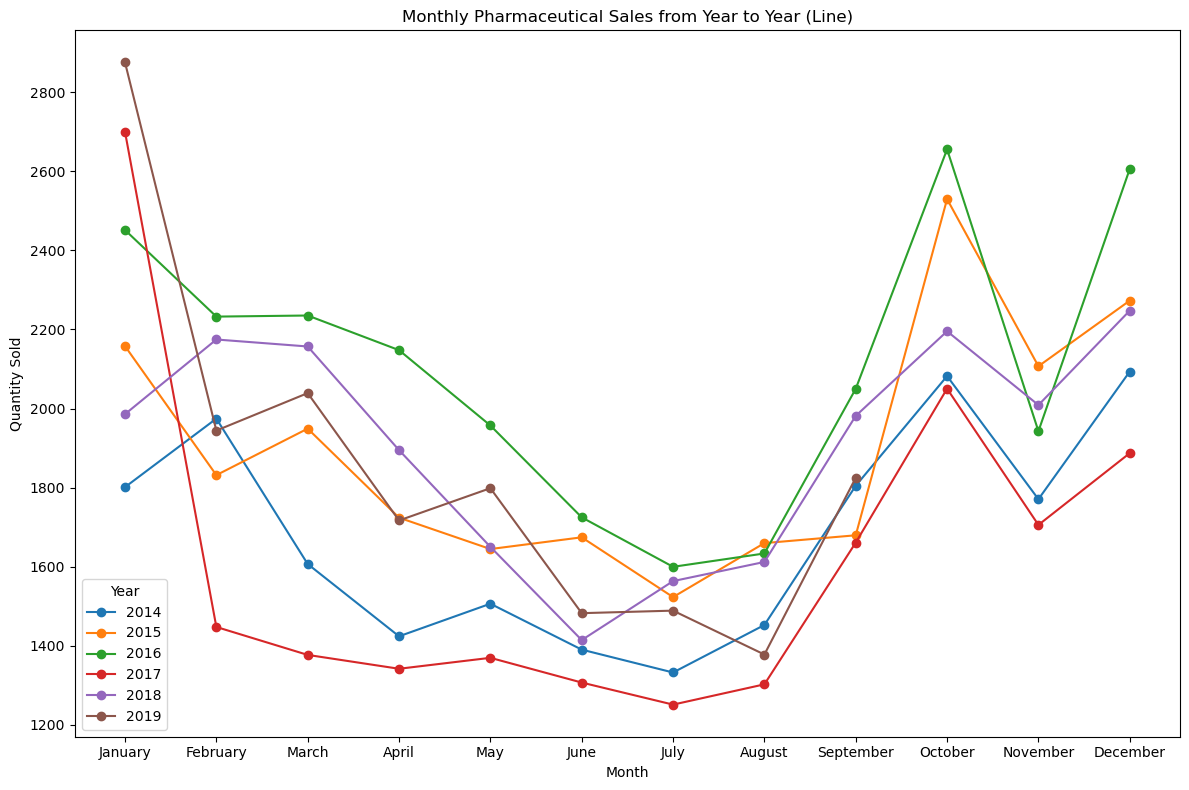

In [129]:
# Grouped line graph of total monthly sales separated by year

# Group by, reshape, aggregate
pivot_df3 = yearly_df.pivot_table(index=['Month'], columns='Year', values='Total_Sales', aggfunc='sum')

# Replace remaining 2019 months of no/incomplete data with NaN so its not plotted
pivot_df3.loc[['October', 'November', 'December'], ['2019']] = np.nan

fig, ax = plt.subplots(figsize=(12, 8))

for year in pivot_df3.columns:
    ax.plot(pivot_df3.index, pivot_df3[year], marker='o', label=str(year))

ax.set_xlabel('Month')
ax.set_ylabel('Quantity Sold')
ax.set_title('Monthly Pharmaceutical Sales from Year to Year (Line)')
ax.legend(title='Year')

plt.tight_layout()
plt.show()

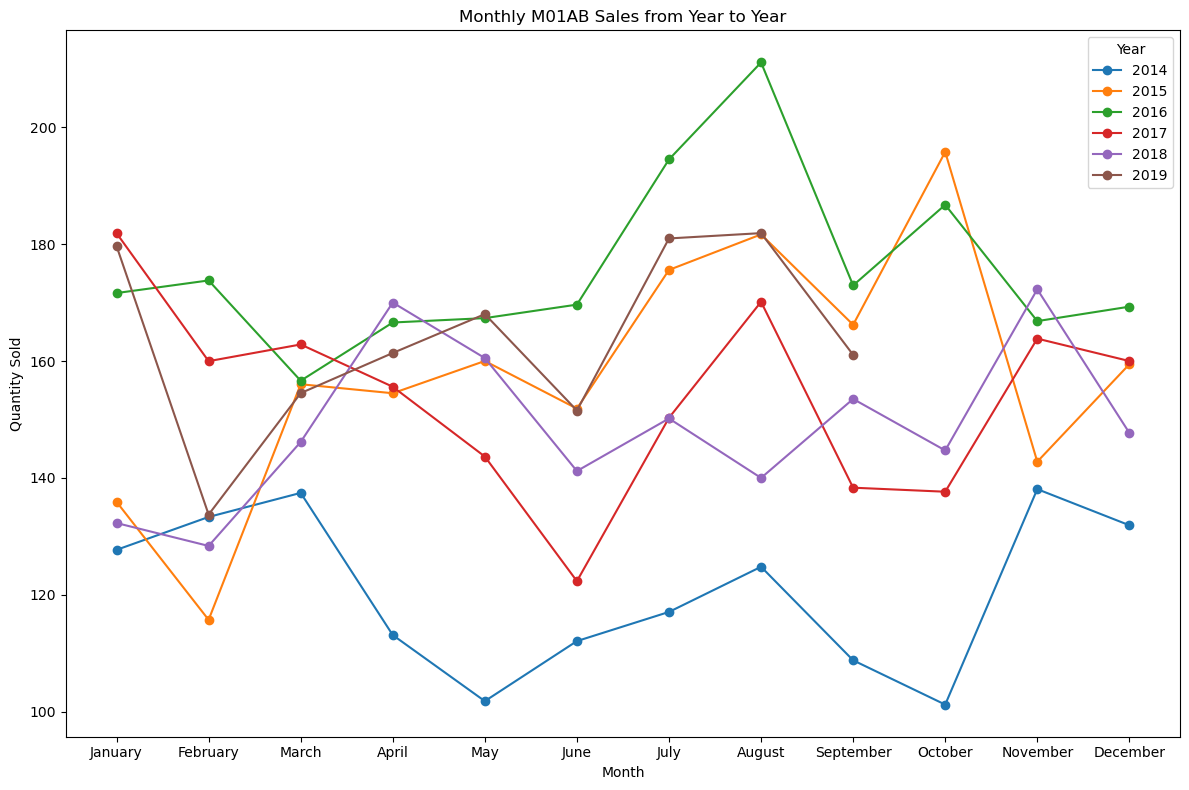

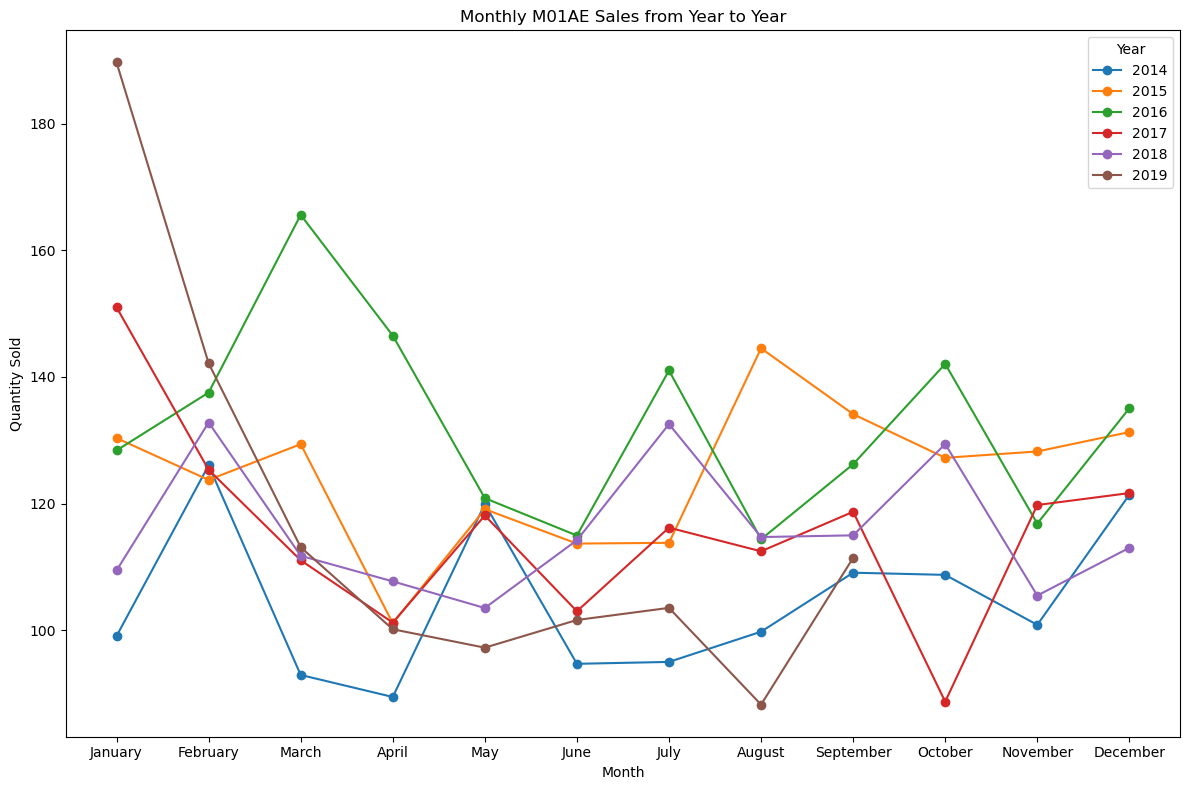

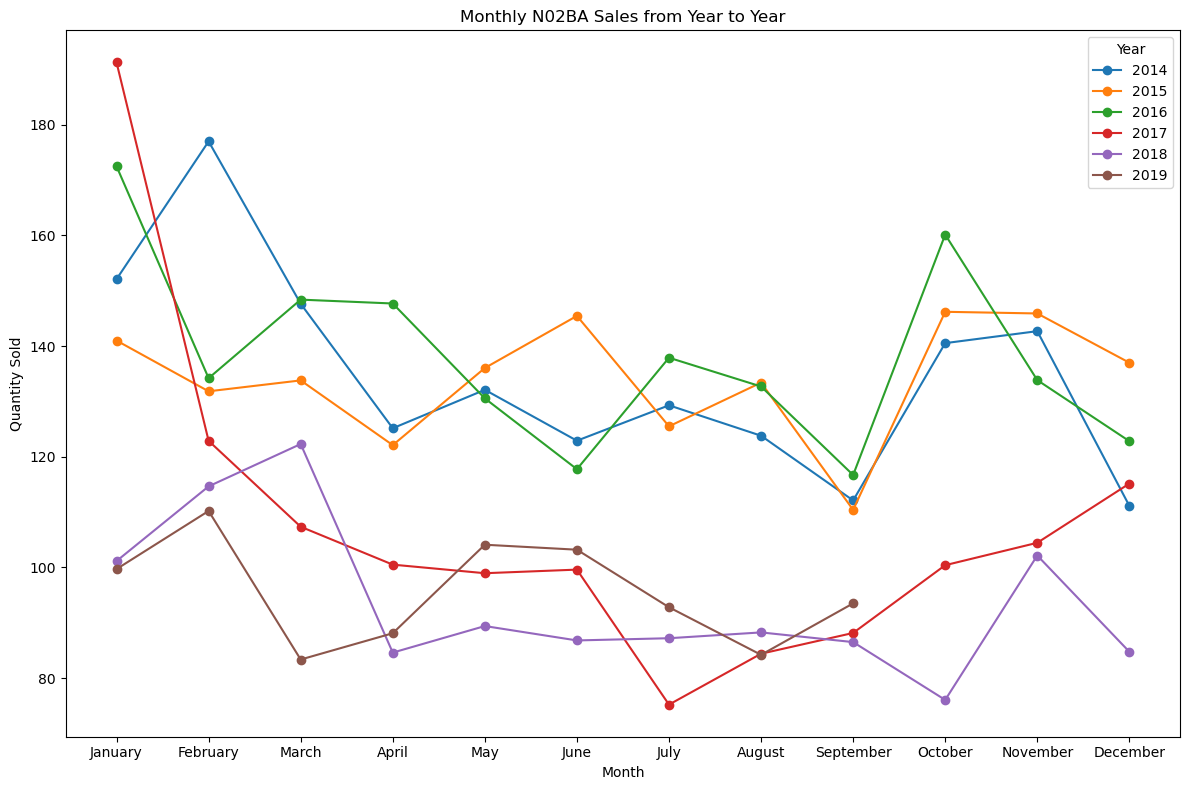

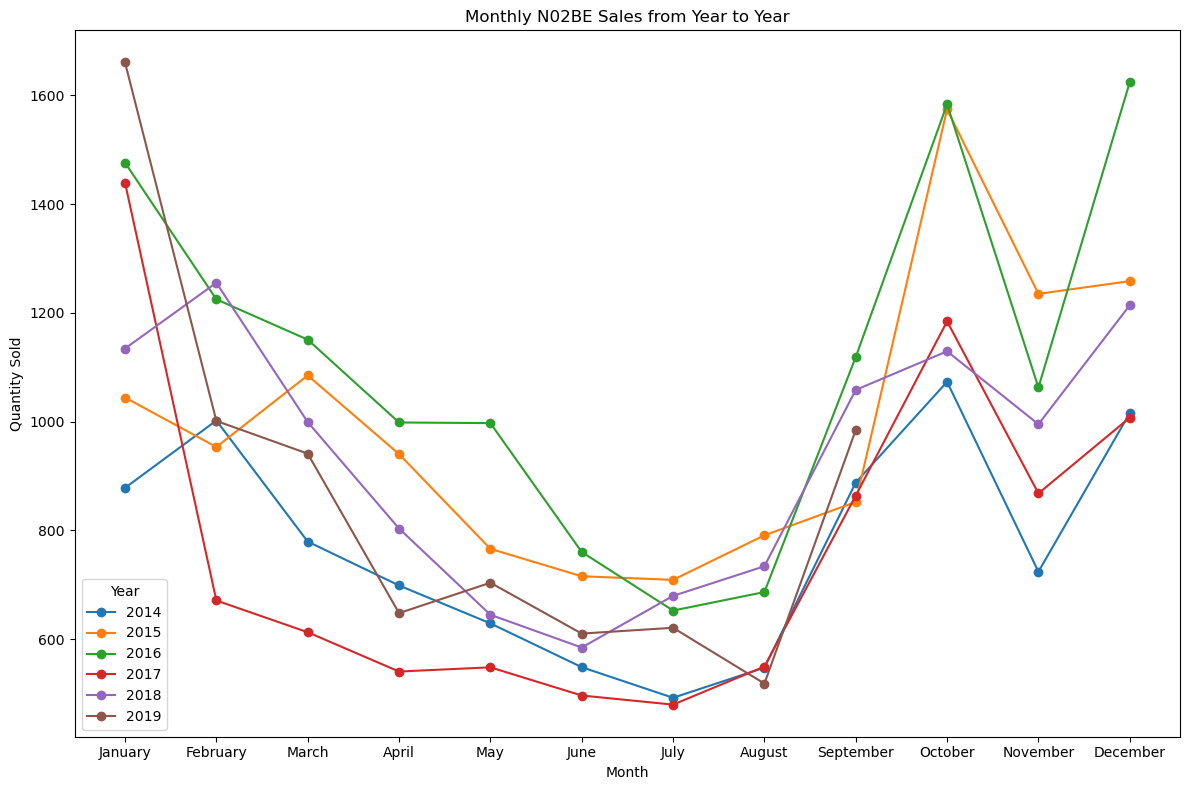

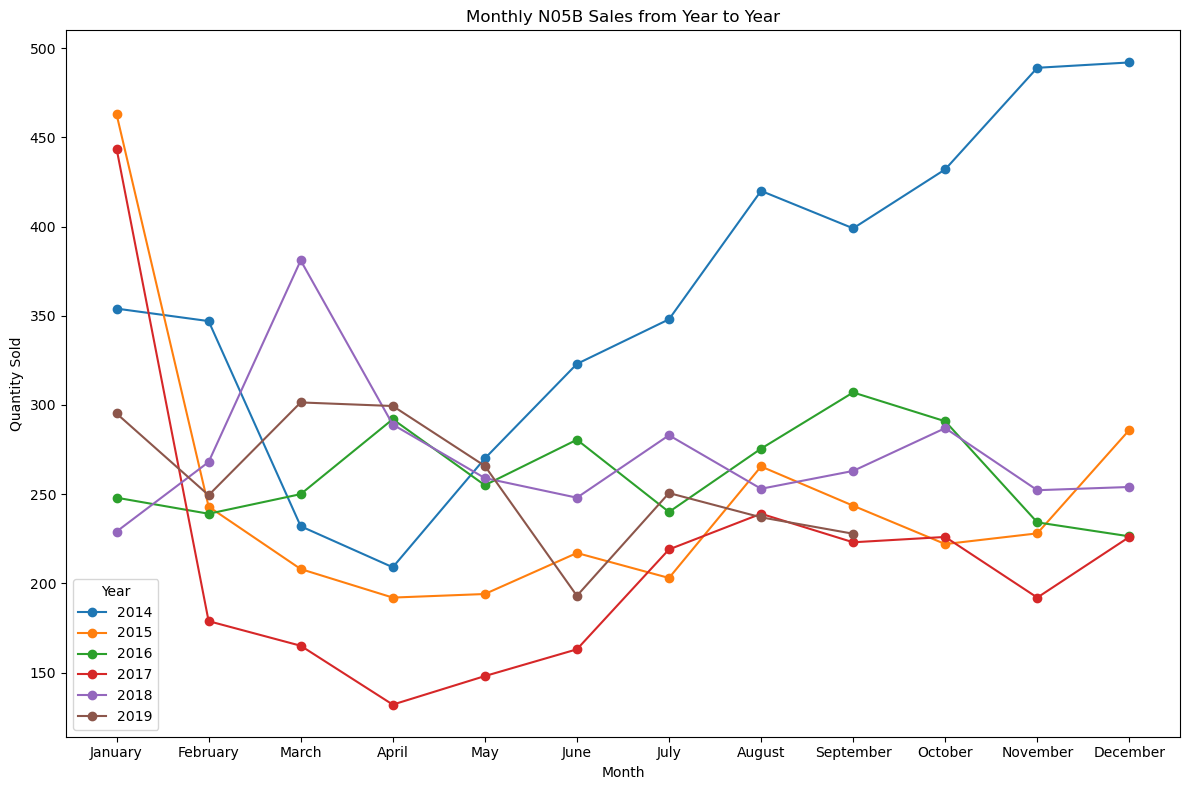

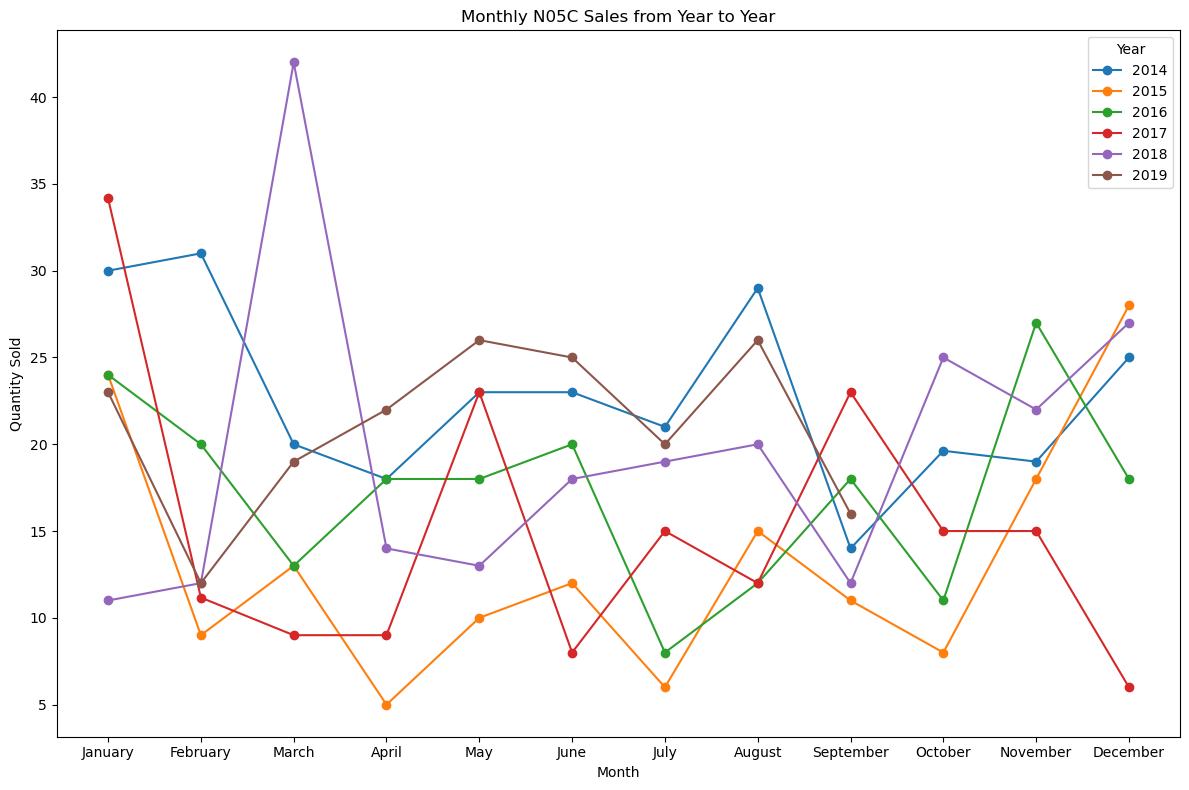

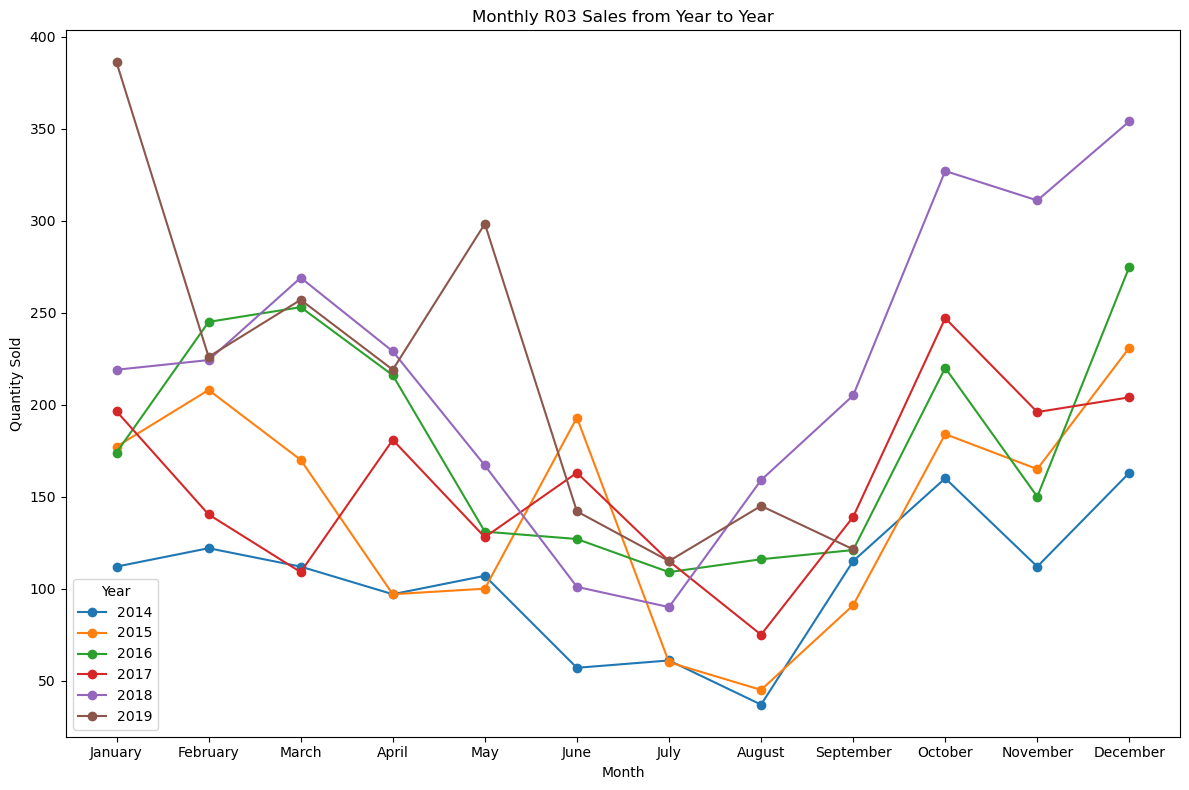

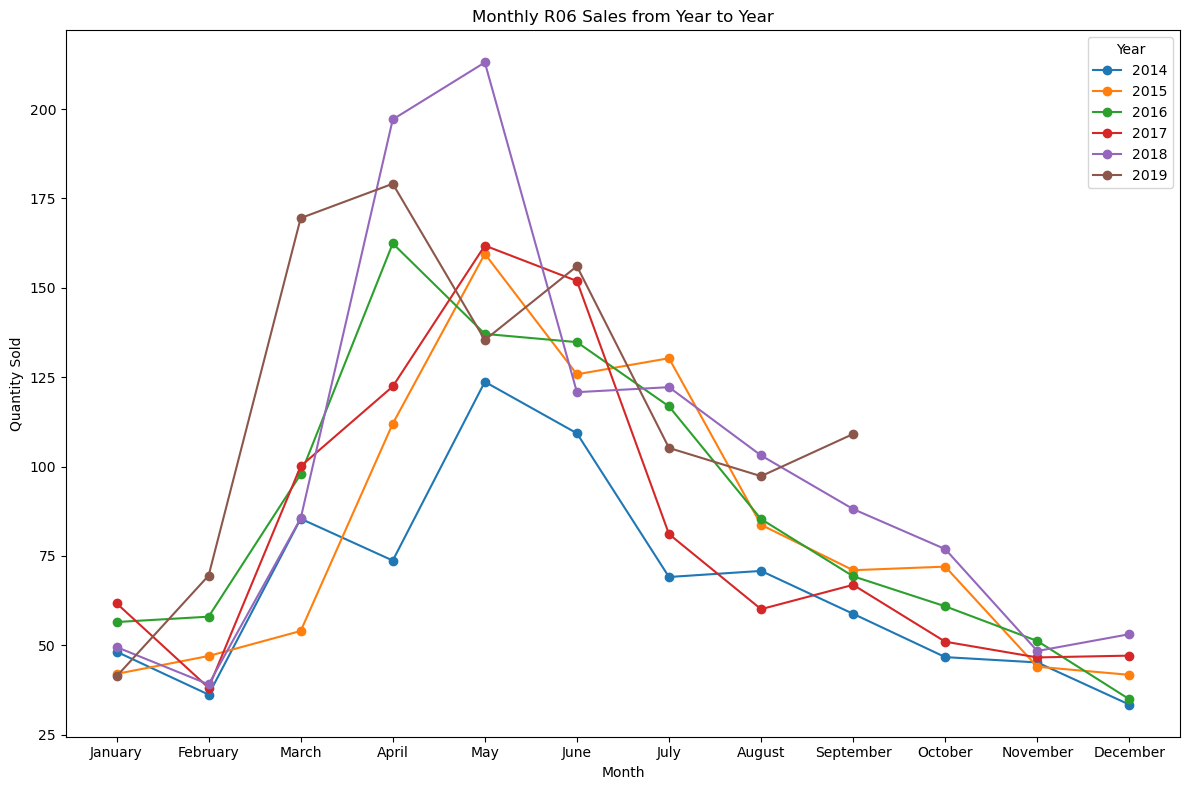

In [130]:
# Grouped line graphs of total monthly sales separated by year - examining individual drug classifications

drugs = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

# For loop for each drug classification graph
for drug in drugs:

    pivot_df4 = yearly_df.pivot_table(index=['Month'], columns='Year', values=drug, aggfunc='sum')

    pivot_df4.loc[['October', 'November', 'December'], ['2019']] = np.nan

    fig, ax = plt.subplots(figsize=(12, 8))

    for year in pivot_df4.columns:
        ax.plot(pivot_df4.index, pivot_df4[year], marker='o', label=str(year))

    ax.set_xlabel('Month')
    ax.set_ylabel('Quantity Sold')
    ax.set_title(f'Monthly {drug} Sales from Year to Year')
    ax.legend(title='Year')

    plt.tight_layout()
    plt.show()

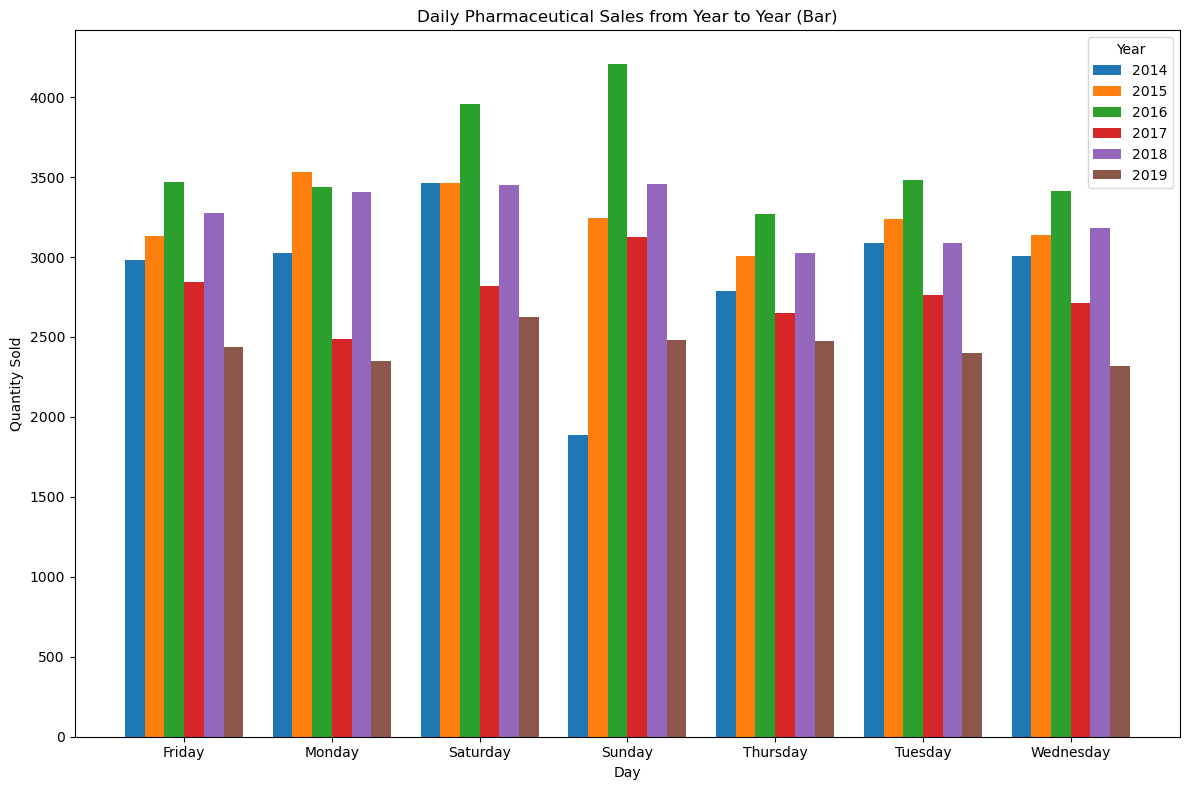

In [131]:
# Grouped bar graph of total daily sales separated by year

# Group by, reshape, aggregate
pivot_df5 = yearly_df.pivot_table(index=['Day'], columns='Year', values='Total_Sales', aggfunc='sum')

fig, ax = plt.subplots(figsize=(12, 8))

n_years = len(pivot_df5.columns)
width = 0.8/n_years
index = np.arange(len(pivot_df5))

for i, year in enumerate(pivot_df5.columns):
    ax.bar(index + i * width, pivot_df5[year], width, label=year)

ax.set_xlabel('Day')
ax.set_ylabel('Quantity Sold')
ax.set_title('Daily Pharmaceutical Sales from Year to Year (Bar)')
ax.set_xticks(index + width * (n_years / 2 - 0.5))
ax.set_xticklabels(pivot_df5.index)
ax.legend(title='Year')

plt.tight_layout()
plt.show()

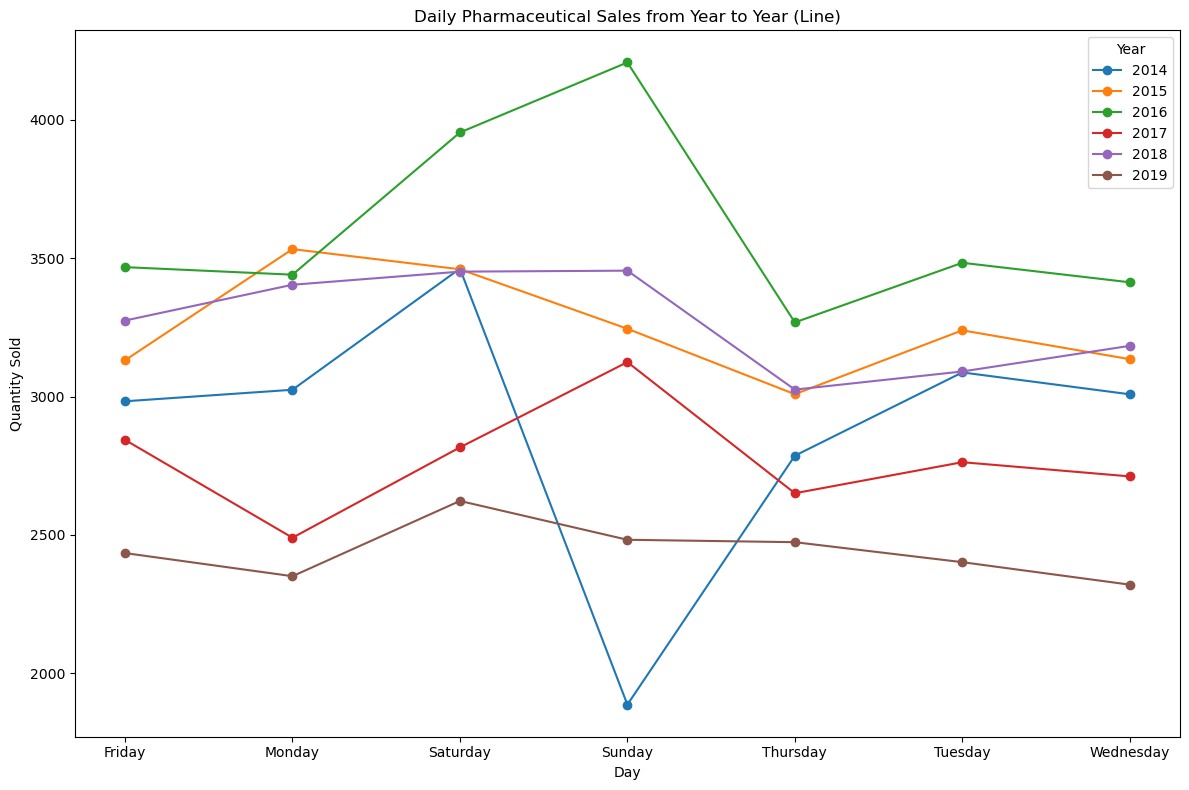

In [132]:
# Grouped line graph of total daily sales separated by year

# Group by, reshape, aggregate
pivot_df6 = yearly_df.pivot_table(index=['Day'], columns='Year', values='Total_Sales', aggfunc='sum')

fig, ax = plt.subplots(figsize=(12, 8))

for year in pivot_df6.columns:
    ax.plot(pivot_df6.index, pivot_df6[year], marker='o', label=str(year))

ax.set_xlabel('Day')
ax.set_ylabel('Quantity Sold')
ax.set_title('Daily Pharmaceutical Sales from Year to Year (Line)')
ax.legend(title='Year')

plt.tight_layout()
plt.show()

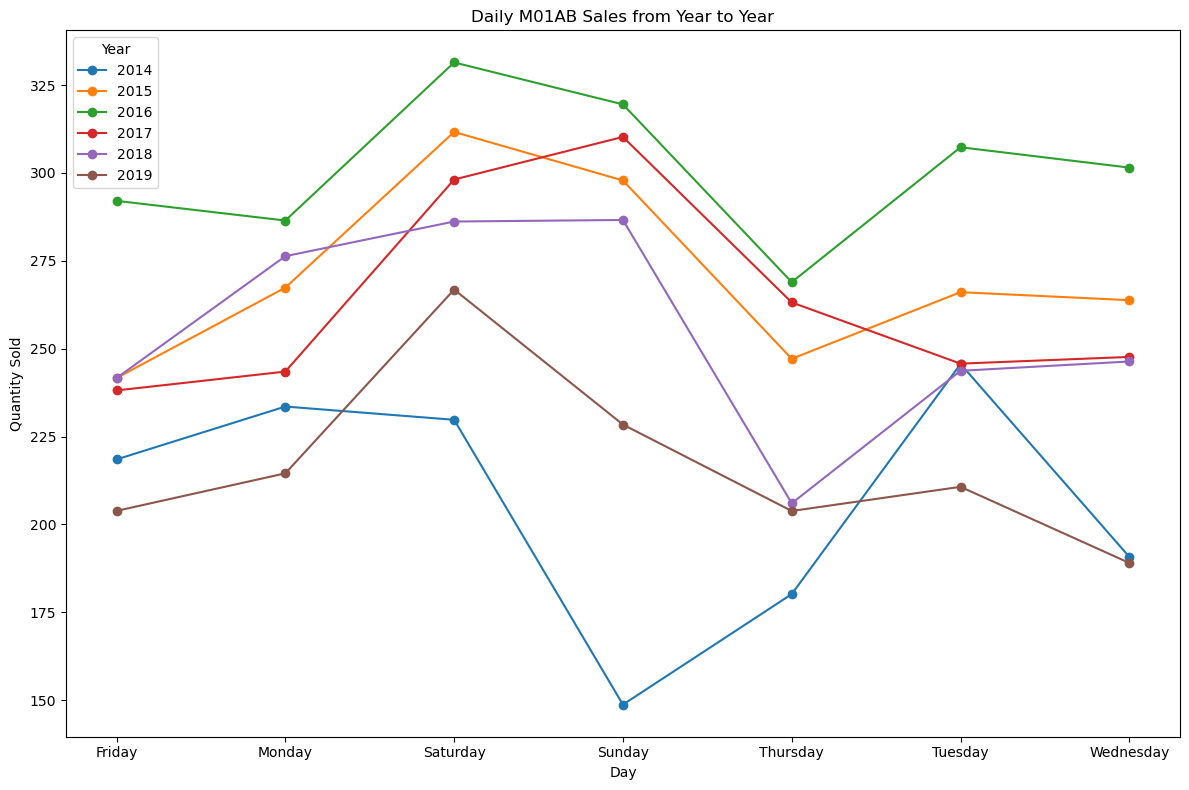

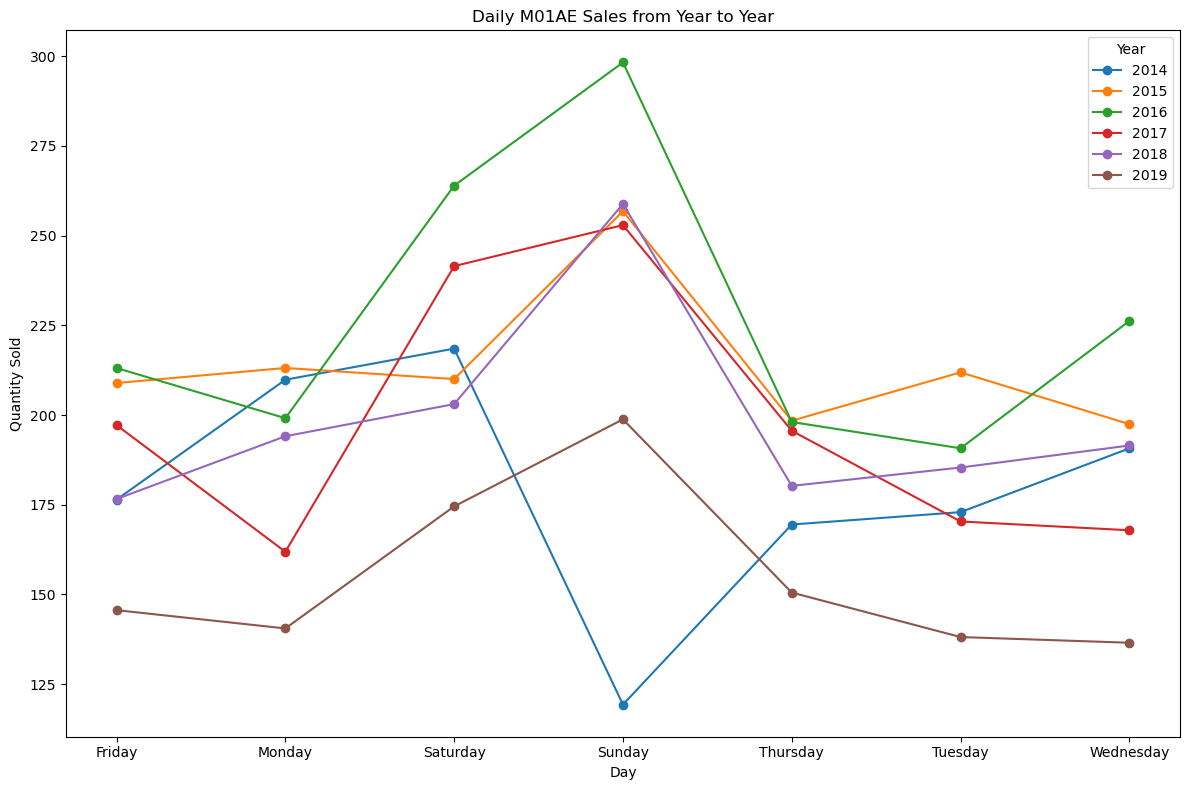

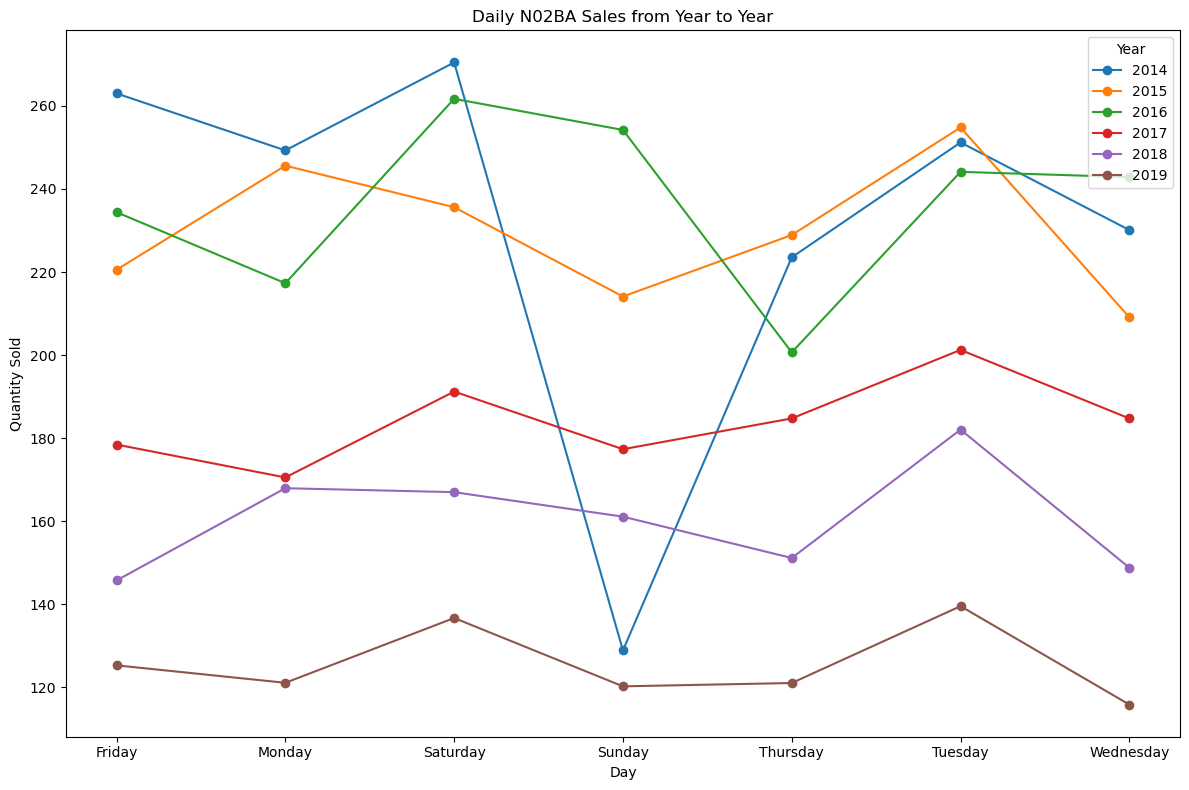

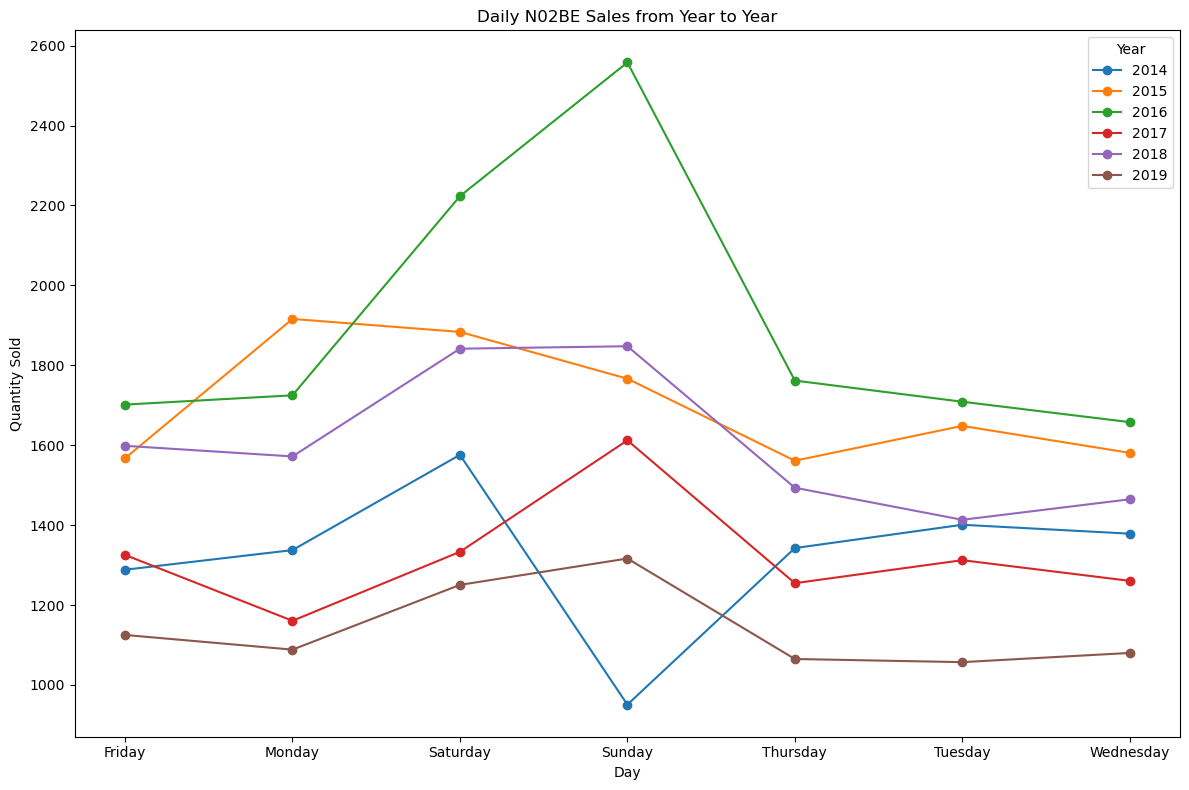

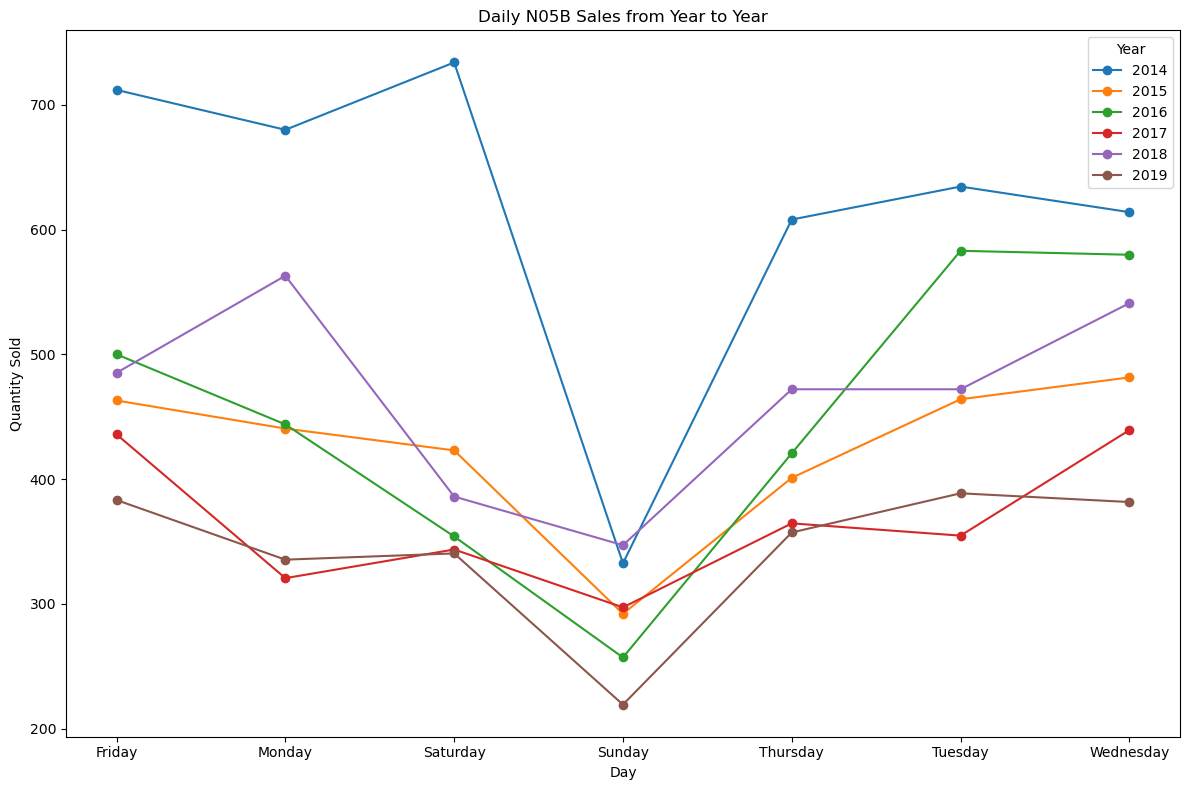

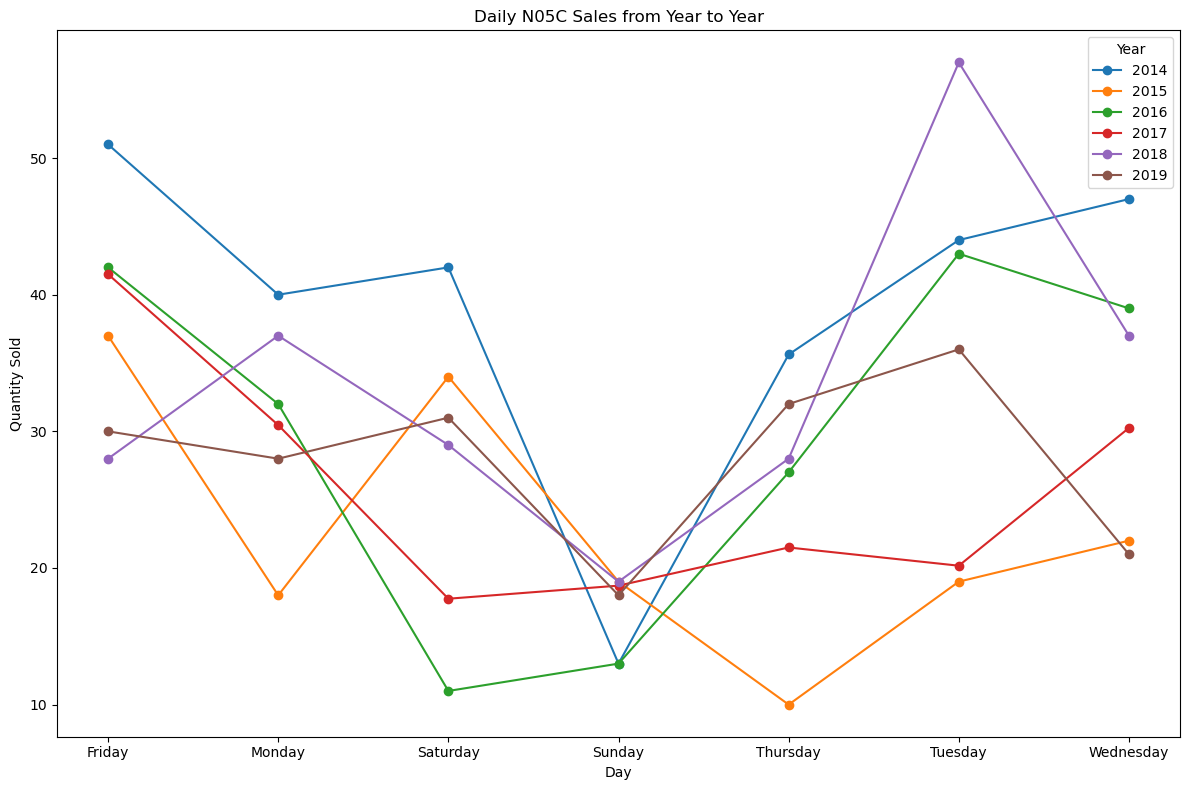

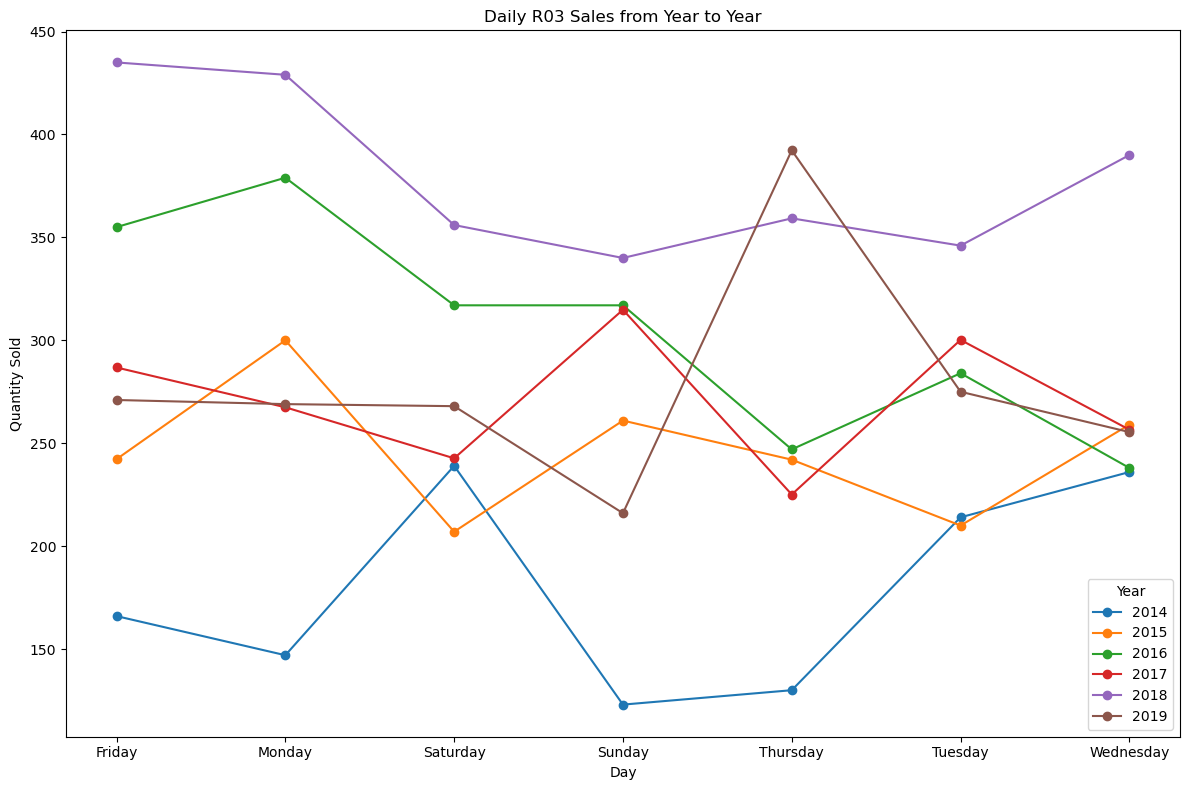

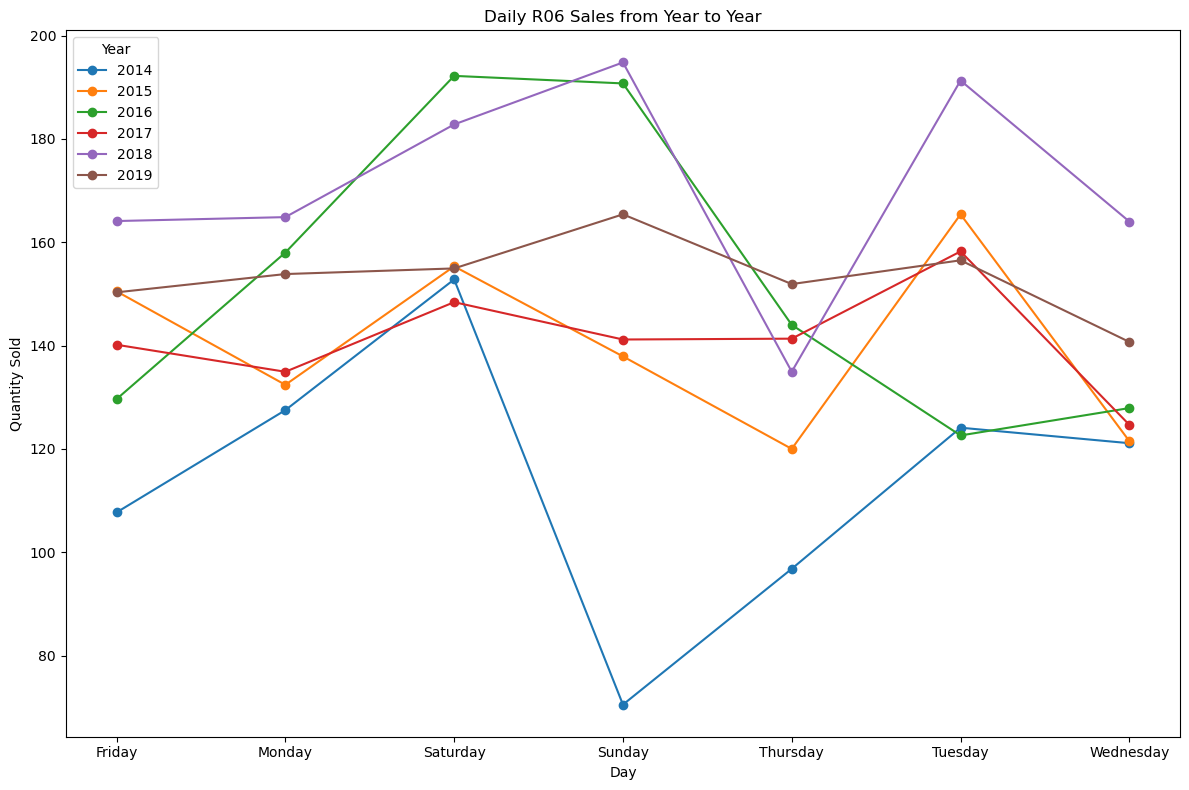

In [133]:
# Grouped line graphs of daily sales separated by year - examining individual drug classifications

# For loop for each drug classification graph
for drug in drugs:

    pivot_df5 = yearly_df.pivot_table(index=['Day'], columns='Year', values=drug, aggfunc='sum')

    fig, ax = plt.subplots(figsize=(12, 8))

    for year in pivot_df5.columns:
        ax.plot(pivot_df5.index, pivot_df5[year], marker='o', label=str(year))

    ax.set_xlabel('Day')
    ax.set_ylabel('Quantity Sold')
    ax.set_title(f'Daily {drug} Sales from Year to Year')
    ax.legend(title='Year')

    plt.tight_layout()
    plt.show()